# Step 1 : Import Data from PostgreSQL

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


'c:\users\asma' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [2]:
# Import libraries
import psycopg2
import pandas as pd

In [3]:
# PostgreSQL connection parameters
params = {
    "host": "127.0.0.1",
    "database": "DW",
    "user": "postgres",
    "password": "root",
    "port": 5432
}

In [4]:
# Function to fetch data from PostgreSQL
def fetch_data(query):
    try:
        # Establish a connection to the PostgreSQL database
        conn = psycopg2.connect(**params)
        # Create a cursor object using the connection
        cursor = conn.cursor()
        # Execute the SQL query
        cursor.execute(query)
        # Fetch all the rows
        data = cursor.fetchall()
        # Close the cursor and connection
        cursor.close()
        conn.close()
        return data
    except (Exception, psycopg2.Error) as error:
        print("Error fetching data from PostgreSQL:", error)
        # Print the specific error message
        if hasattr(error, 'pgerror'):
            print("PostgreSQL Error:", error.pgerror)
        if hasattr(error, 'diag'):
            print("PostgreSQL Diagnostic Error:", error.diag.message_primary)
        return None  # Return None in case of error

In [5]:
# Convert fetched data into a pandas DataFrame with appropriate data types
def create_dataframe(query, columns):
    # Fetch data from PostgreSQL
    data = fetch_data(query)
    if data is not None:
        # Create DataFrame with fetched data and specified columns
        df = pd.DataFrame(data, columns=columns)
        # Convert data types of columns if necessary
        # df['column_name'] = df['column_name'].astype('desired_type')
        return df
    else:
        return None


In [6]:
# Define queries for each table
queries = {
    "Dim_Brand_Prod": "SELECT \"Name_brand\", \"Brand_id\" FROM public.\"Dim_Brand_Prod\"",
    "Dim_Consumer_Prod": "SELECT \"Consumer_Id\", categorie_socio_professionnel, \"Tranche_Age\", \"Sexe\", \"Preference_Marque_Texture\", \"Preference_Marque_Gout\", \"Preference_Marque_Odeur\", \"Preference_Marque_Forme\", \"Preference_Marque_Variete\", \"Preference_Marque_Emballage\", \"Critere_1_plus_important\", \"Critere_2_plus_important\", \"Critere_3_plus_important\", \"Critere_4_plus_important\", \"Critere_5_plus_important\", \"Points_Amelioration\", \"Design_emballage\", \"Praticite_emballage\", \"Information_emballage\", \"Protection_emballage\", \"Emballage_ecologique\", \"Paiement_Emballage\" FROM public.\"Dim_Consumer_Prod\"",
    "Dim_Date_Tot": "SELECT \"Date_Id\", \"Date\", \"Month\", \"Day\", \"Year\" FROM public.\"Dim_Date_Tot\"",
    "Dim_Product_Prod": "SELECT \"Food_Product_Id\", product_name, \"Product_Categorie\", \"Package\", \"Eco_Score\" FROM public.\"Dim_Product_Prod\"",
    "Dim_Region_Tot": "SELECT \"Region_Id\", \"Region\" FROM public.\"Dim_Region_Tot\"",
    "Fact_Prod": "SELECT \"Fact_Production_Id\", \"Food_Product_Id\", \"Region_Id\", \"Brand_id\", \"Date_Id\", \"Consumer_Id\", \"Gout_Sucre\", \"Gout_Sale\", \"Gout_Amere\", energy_kj_value, carbohydrates_value_g, \"Odeur\", \"Texture\", \"Couleur\", fat_value_g, proteins_value_g FROM public.\"Fact_Prod\""
}

In [7]:
# Define columns for each table
columns = {
    "Dim_Brand_Prod": ["Name_brand", "Brand_id"],
    "Dim_Consumer_Prod": ["Consumer_Id", "categorie_socio_professionnel", "Tranche_Age", "Sexe", "Preference_Marque_Texture", "Preference_Marque_Gout", "Preference_Marque_Odeur", "Preference_Marque_Forme", "Preference_Marque_Variete", "Preference_Marque_Emballage", "Critere_1_plus_important", "Critere_2_plus_important", "Critere_3_plus_important", "Critere_4_plus_important", "Critere_5_plus_important", "Points_Amelioration", "Design_emballage", "Praticite_emballage", "Information_emballage", "Protection_emballage", "Emballage_ecologique", "Paiement_Emballage"],
    "Dim_Date_Tot": ["Date_Id", "Date", "Month", "Day", "Year"],
    "Dim_Product_Prod": ["Food_Product_Id", "product_name", "Product_Categorie", "Package", "Eco_Score"],
    "Dim_Region_Tot": ["Region_Id", "Region"],
    "Fact_Prod": ["Fact_Production_Id", "Food_Product_Id", "Region_Id", "Brand_id", "Date_Id", "Consumer_Id", "Gout_Sucre", "Gout_Sale", "Gout_Amere", "energy_kj_value", "carbohydrates_value_g", "Odeur", "Texture", "Couleur", "fat_value_g", "proteins_value_g"]
}

In [8]:
# Create DataFrames for each table
dataframes = {}
for table, query in queries.items():
    dataframes[table] = create_dataframe(query, columns[table])

In [9]:
# Joining tables into a single DataFrame
joined_df = dataframes["Fact_Prod"]
for table in ["Dim_Brand_Prod", "Dim_Consumer_Prod", "Dim_Date_Tot", "Dim_Product_Prod", "Dim_Region_Tot"]:
    joined_df = pd.merge(joined_df, dataframes[table], how="left", on=dataframes[table].columns.intersection(joined_df.columns).tolist())

In [10]:
# Assign a short name to the final dataset
warda_df = joined_df.copy()

In [11]:
# Drop the ID columns
warda_df = warda_df.drop(columns=["Fact_Production_Id", "Food_Product_Id", "Region_Id", "Brand_id", "Date_Id", "Consumer_Id", "Year"])

In [12]:
# Display the final dataset as a table
print("Production Dataset:")
# Display the final dataset as a table
warda_df

Production Dataset:


,Gout_Sucre,Gout_Sale,Gout_Amere,energy_kj_value,carbohydrates_value_g,Odeur,Texture,Couleur,fat_value_g,proteins_value_g,...,Emballage_ecologique,Paiement_Emballage,Date,Month,Day,product_name,Product_Categorie,Package,Eco_Score,Region
0,3,2,2,1485,73.0,2,3,3,1.90,12.50,...,Oui,Oui,2024-03-22,mars,22,PLUME,PÂTES COURTES,SACHET PLASTIQUE,65,TUNIS
1,2,4,1,1485,73.0,3,4,3,1.90,12.50,...,Oui,Non,2024-03-23,mars,23,SPAGHETTI,PÂTES LONGUES,SACHET PLASTIQUE,65,SOUSSE
2,1,1,1,1485,73.0,3,4,2,1.90,12.50,...,Oui,Non,2024-03-24,mars,24,SPAGHETTI,PÂTES LONGUES,SACHET PLASTIQUE,65,BEN AROUS
3,2,3,1,1485,73.0,4,1,0,1.90,12.50,...,Oui,Oui,2024-03-25,mars,25,CANNELLONI,PÂTES SPÉCIALES,CARTON,73,JENDOUBA
4,1,1,1,1485,73.0,3,3,3,1.90,12.50,...,Oui,Non,2024-03-26,mars,26,COQUILLETTE,PÂTES COURTES,SACHET PLASTIQUE,65,NABEUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,1,1,1519,72.0,3,3,0,1.50,12.00,...,Oui,Non,2024-02-27,févr.,27,FELL,PÂTES COURTES,SACHET PLASTIQUE,65,MONASTIR
125,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,Non,Oui,2024-02-27,févr.,27,FELL 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,KEBILI
126,3,3,3,1447,73.1,3,3,0,0.84,11.59,...,Non,Oui,2024-02-27,févr.,27,COUDE 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,SILIANA
127,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,Oui,Non,2024-02-27,févr.,27,COUDE 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,BEN AROUS


# Step 2 : Data Exploration and Understanding

In [1814]:
warda_df = pd.read_excel('C:\Users\Asma Laaribi\OneDrive\Bureau\MyWorkspace\Projets\CéréaSmart Analytics\[Food Industry]  CéréaSmart Analytics Intelligent Insight for Agri-Food\Sensory Analysis\production_dataset.xlsx')
warda_df

,Gout_Sucre,Gout_Sale,Gout_Amere,energy_kj_value,carbohydrates_value_g,Odeur,Texture,Couleur,fat_value_g,proteins_value_g,...,Emballage_ecologique,Paiement_Emballage,Date,Month,Day,product_name,Product_Categorie,Package,Eco_Score,Region
0,3,2,2,1485,73.0,2,3,3,1.90,12.50,...,Oui,Oui,2024-03-22,mars,22,PLUME,PÂTES COURTES,SACHET PLASTIQUE,65,TUNIS
1,2,4,1,1485,73.0,3,4,3,1.90,12.50,...,Oui,Non,2024-03-23,mars,23,SPAGHETTI,PÂTES LONGUES,SACHET PLASTIQUE,65,SOUSSE
2,1,1,1,1485,73.0,3,4,2,1.90,12.50,...,Oui,Non,2024-03-24,mars,24,SPAGHETTI,PÂTES LONGUES,SACHET PLASTIQUE,65,BEN AROUS
3,2,3,1,1485,73.0,4,1,0,1.90,12.50,...,Oui,Oui,2024-03-25,mars,25,CANNELLONI,PÂTES SPÉCIALES,CARTON,73,JENDOUBA
4,1,1,1,1485,73.0,3,3,3,1.90,12.50,...,Oui,Non,2024-03-26,mars,26,COQUILLETTE,PÂTES COURTES,SACHET PLASTIQUE,65,NABEUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,1,1,1519,72.0,3,3,0,1.50,12.00,...,Oui,Non,2024-02-27,févr.,27,FELL,PÂTES COURTES,SACHET PLASTIQUE,65,MONASTIR
125,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,Non,Oui,2024-02-27,févr.,27,FELL 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,KEBILI
126,3,3,3,1447,73.1,3,3,0,0.84,11.59,...,Non,Oui,2024-02-27,févr.,27,COUDE 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,SILIANA
127,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,Oui,Non,2024-02-27,févr.,27,COUDE 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,BEN AROUS


In [1815]:
warda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Gout_Sucre                     129 non-null    int64         
 1   Gout_Sale                      129 non-null    int64         
 2   Gout_Amere                     129 non-null    int64         
 3   energy_kj_value                129 non-null    int64         
 4   carbohydrates_value_g          129 non-null    float64       
 5   Odeur                          129 non-null    int64         
 6   Texture                        129 non-null    int64         
 7   Couleur                        129 non-null    int64         
 8   fat_value_g                    129 non-null    float64       
 9   proteins_value_g               129 non-null    float64       
 10  Name_brand                     129 non-null    object        
 11  categorie_socio_pro

In [1816]:
summary_stats = warda_df.describe()
summary_stats

,Gout_Sucre,Gout_Sale,Gout_Amere,energy_kj_value,carbohydrates_value_g,Odeur,Texture,Couleur,fat_value_g,proteins_value_g,Date,Day,Eco_Score
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129,129.000000,129.000000
mean,1.573643,1.643411,1.364341,1501.852713,71.564341,2.891473,2.852713,1.387597,2.117984,12.459070,2024-03-25 18:02:47.441860352,21.186047,65.162791
min,0.000000,0.000000,0.000000,1447.000000,65.000000,0.000000,0.000000,0.000000,0.840000,11.590000,2024-02-26 00:00:00,1.000000,60.000000
25%,1.000000,1.000000,1.000000,1485.000000,72.000000,3.000000,2.000000,0.000000,1.500000,12.000000,2024-02-27 00:00:00,20.000000,65.000000
50%,1.000000,1.000000,1.000000,1519.000000,72.000000,3.000000,3.000000,1.000000,1.900000,12.500000,2024-03-24 00:00:00,24.000000,65.000000
75%,2.000000,2.000000,1.000000,1519.000000,73.000000,3.000000,3.000000,3.000000,1.900000,12.500000,2024-04-13 00:00:00,27.000000,65.000000
max,5.000000,5.000000,5.000000,1555.000000,73.100000,5.000000,5.000000,5.000000,6.000000,14.500000,2024-05-07 00:00:00,31.000000,74.000000
std,0.925128,0.974667,0.959638,29.436930,2.381891,0.920600,0.969059,1.542675,1.387779,0.767548,NaN,7.539238,3.383763


In [1817]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):

        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns
missing_values_table(warda_df)

,Missing Values,% of Total Values
Design_emballage,3,2.3
Praticite_emballage,3,2.3
Information_emballage,3,2.3
Protection_emballage,3,2.3
Emballage_ecologique,3,2.3
Paiement_Emballage,3,2.3


In [1818]:
#Drop rows with missing values
warda_df.dropna(inplace=True)

In [1819]:
# Drop the ID columns
warda_df = warda_df.drop(columns=['Month','Day','Date'])

In [1820]:
warda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 128
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gout_Sucre                     126 non-null    int64  
 1   Gout_Sale                      126 non-null    int64  
 2   Gout_Amere                     126 non-null    int64  
 3   energy_kj_value                126 non-null    int64  
 4   carbohydrates_value_g          126 non-null    float64
 5   Odeur                          126 non-null    int64  
 6   Texture                        126 non-null    int64  
 7   Couleur                        126 non-null    int64  
 8   fat_value_g                    126 non-null    float64
 9   proteins_value_g               126 non-null    float64
 10  Name_brand                     126 non-null    object 
 11  categorie_socio_professionnel  126 non-null    object 
 12  Tranche_Age                    126 non-null    object 


In [1821]:
# Check for duplicates
duplicate_rows = warda_df.duplicated().sum()
duplicated_rows =  warda_df[ warda_df.duplicated(keep=False)]

# Display duplicate rows
print("Duplicate Rows:")
duplicated_rows

Duplicate Rows:


,Gout_Sucre,Gout_Sale,Gout_Amere,energy_kj_value,carbohydrates_value_g,Odeur,Texture,Couleur,fat_value_g,proteins_value_g,...,Praticite_emballage,Information_emballage,Protection_emballage,Emballage_ecologique,Paiement_Emballage,product_name,Product_Categorie,Package,Eco_Score,Region
59,2,2,1,1519,72.0,3,4,0,1.50,12.00,...,Moyen,Bon,Moyen,Oui,Non,FELL,PÂTES COURTES,SACHET PLASTIQUE,65,NABEUL
60,1,1,1,1519,72.0,3,4,0,1.50,12.00,...,Moyen,Moyen,Moyen,Peut-être,Non,SPAGHETTI,PÂTES LONGUES,SACHET PLASTIQUE,65,NABEUL
61,1,1,1,1519,72.0,3,3,3,1.50,12.00,...,Insatisfaisant,Insatisfaisant,Insatisfaisant,Oui,Oui,FELL,PÂTES COURTES,SACHET PLASTIQUE,65,GAFSA
62,1,1,1,1519,72.0,3,3,0,1.50,12.00,...,Insatisfaisant,Insatisfaisant,Moyen,Non,Non,PLUME,PÂTES COURTES,SACHET PLASTIQUE,65,BEN AROUS
63,1,1,1,1458,73.0,3,3,0,1.90,12.50,...,Bon,Bon,Moyen,Peut-être,Oui,LASAGNE,PÂTES SPÉCIALES,CARTON,60,KAIROUAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,1,1,1519,72.0,3,3,0,1.50,12.00,...,Mauvais,Bon,Moyen,Oui,Non,FELL,PÂTES COURTES,SACHET PLASTIQUE,65,MONASTIR
125,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,Moyen,Moyen,Moyen,Non,Oui,FELL 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,KEBILI
126,3,3,3,1447,73.1,3,3,0,0.84,11.59,...,Moyen,Moyen,Moyen,Non,Oui,COUDE 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,SILIANA
127,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,Mauvais,Bon,Moyen,Oui,Non,COUDE 5 CÉRÉALES,PÂTES 5 CÉRÉALES,SACHET PLASTIQUE,60,BEN AROUS


### Outliers

In [1822]:
#number of outliers in each column
numeric_cols = warda_df.select_dtypes(include=['number']).columns

In [1823]:
for col in numeric_cols:
    Q1 = warda_df[col].quantile(0.25)
    Q3 = warda_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    
    outliers = warda_df[(warda_df[col] < low_bound) | (warda_df[col] > up_bound)]
    
    print(f"Number of outliers detected in {col}: {len(outliers)}")
    if not outliers.empty:
        print(f"Outliers in {col}:")
        print(outliers)


Number of outliers detected in Gout_Sucre: 4
Outliers in Gout_Sucre:
     Gout_Sucre  Gout_Sale  Gout_Amere  energy_kj_value  \
23            4          4           1             1485   
41            4          3           2             1485   
86            5          5           1             1519   
121           5          5           1             1519   

     carbohydrates_value_g  Odeur  Texture  Couleur  fat_value_g  \
23                    73.0      5        3        0          1.9   
41                    71.0      2        3        2          1.9   
86                    72.0      3        2        0          1.5   
121                   72.0      3        2        0          1.5   

     proteins_value_g  ... Praticite_emballage Information_emballage  \
23               12.5  ...               Moyen                   Bon   
41               12.5  ...      Insatisfaisant        Insatisfaisant   
86               12.0  ...                 Bon                   Bon   
121   

All these observations were collected through a closed-ended form with single or multiple choice options, hence the respondents' answers do not exhibit outliers, so we will retain them.

In [1824]:
warda_df['Name_brand'].head(40)

0     Epi d' Or
1     Epi d' Or
2     Epi d' Or
3     Epi d' Or
4     Epi d' Or
5     Epi d' Or
6     Epi d' Or
7     Epi d' Or
8     Epi d' Or
9     Epi d' Or
10    Epi d' Or
11    Epi d' Or
12    Epi d' Or
13    Epi d' Or
14    Epi d' Or
15    Epi d' Or
16    Epi d' Or
17    Epi d' Or
18    Epi d' Or
19    Epi d' Or
20    Epi d' Or
21    Epi d' Or
22    Epi d' Or
23    Epi d' Or
26    Epi d' Or
27    Epi d' Or
28    Epi d' Or
29    Epi d' Or
30    Epi d' Or
31    Epi d' Or
32    Epi d' Or
33    Epi d' Or
34    Epi d' Or
35    Epi d' Or
36    Epi d' Or
37    Epi d' Or
38    Epi d' Or
39    Epi d' Or
40    Epi d' Or
41    Epi d' Or
Name: Name_brand, dtype: object

### Plot some variables 

We wil try first to plot some of these features in order to get an idea about our data.
##### 1. customer caracteristics

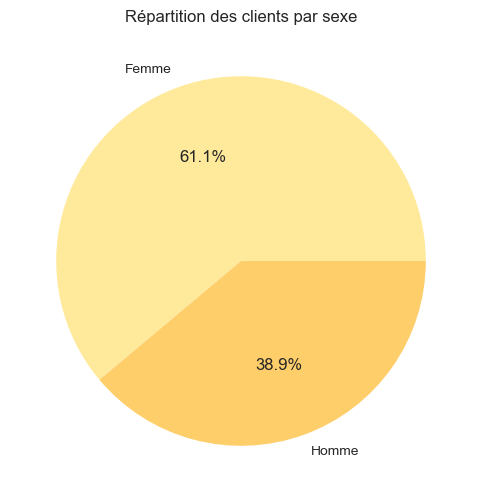

In [1825]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
warda_df['Sexe'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('YlOrRd'))
plt.title("Répartition des clients par sexe")
plt.ylabel("")
plt.show()



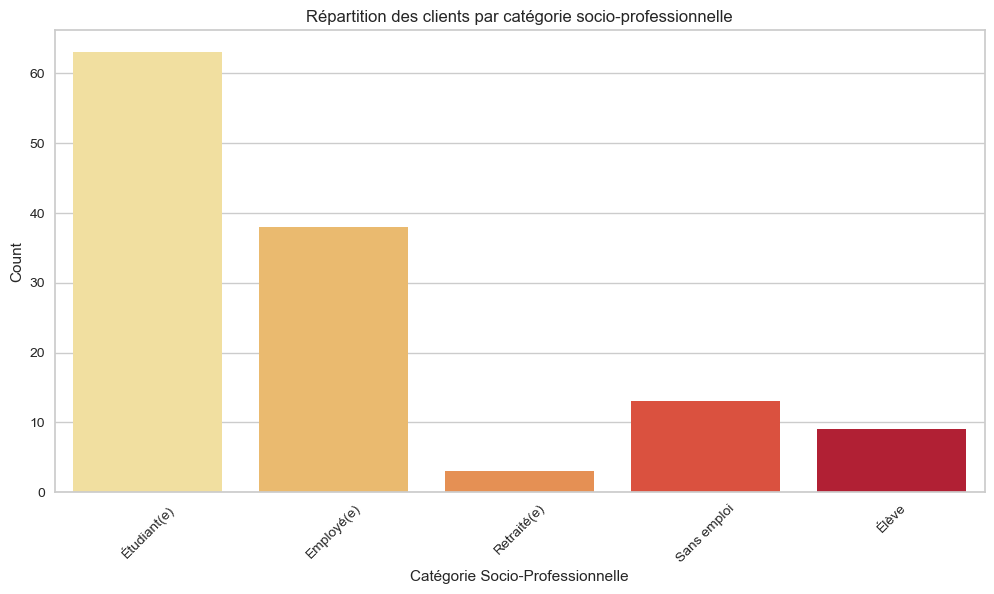

In [1826]:

plt.figure(figsize=(12, 6))
sns.countplot(data=warda_df, x='categorie_socio_professionnel', palette='YlOrRd')
plt.title("Répartition des clients par catégorie socio-professionnelle")
plt.xlabel("Catégorie Socio-Professionnelle")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


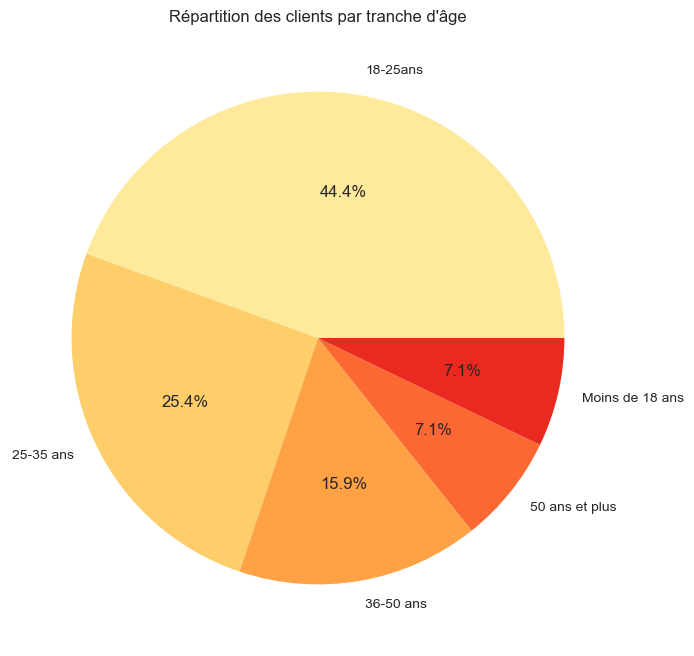

In [1827]:

plt.figure(figsize=(8, 8))
warda_df['Tranche_Age'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('YlOrRd'))
plt.title("Répartition des clients par tranche d'âge")
plt.ylabel("")
plt.show()


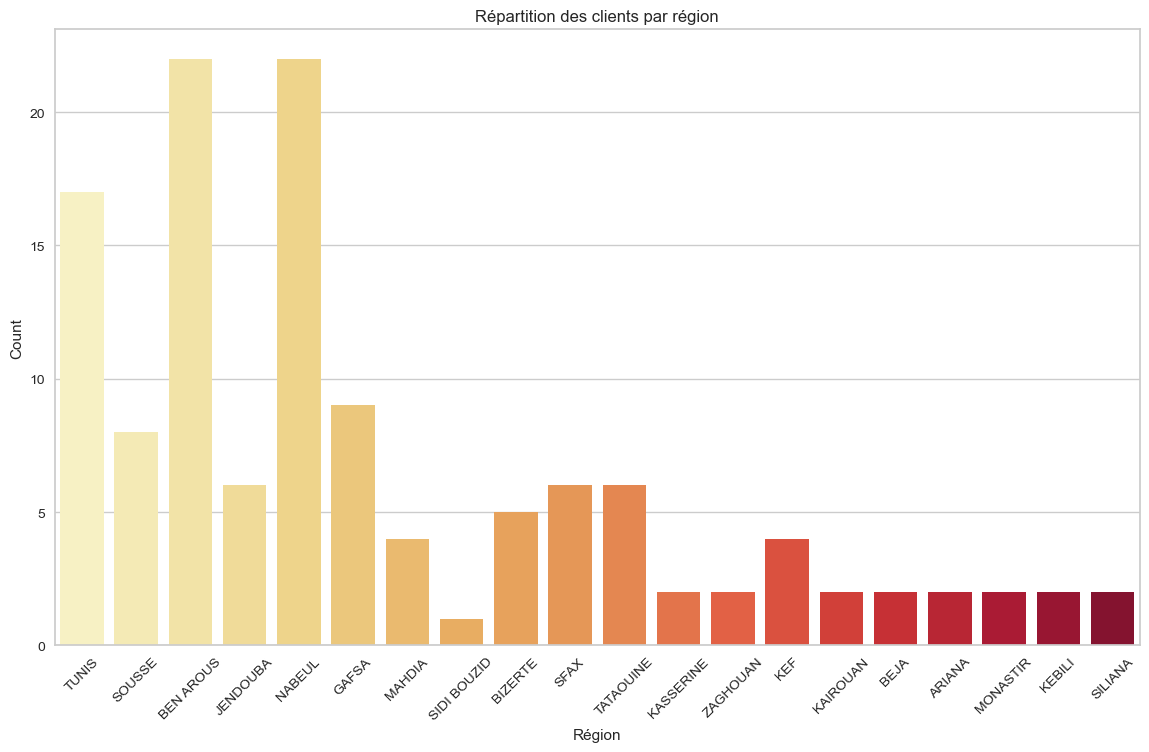

In [1828]:

plt.figure(figsize=(14, 8))
sns.countplot(data=warda_df, x='Region', palette='YlOrRd')
plt.title("Répartition des clients par région")
plt.xlabel("Région")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### Features Selection

In [1830]:
warda_df_Sens = ['Gout_Sucre', 'Gout_Sale','Gout_Amere','Odeur','Texture','Couleur']

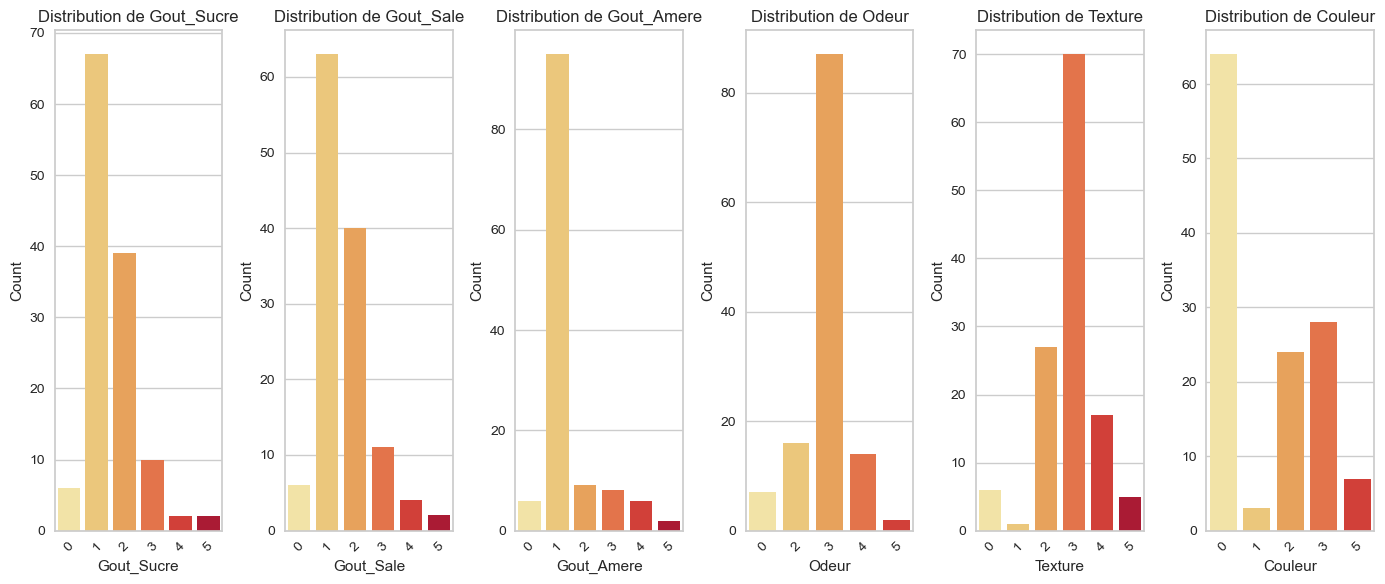

In [1831]:
import seaborn as sns
import matplotlib.pyplot as plt


colors = sns.color_palette("YlOrRd", len(warda_df_Sens))


plt.figure(figsize=(14, 6))


for i, col in enumerate(warda_df_Sens):
    plt.subplot(1, len(warda_df_Sens), i+1)
    sns.countplot(data=warda_df, x=col, palette=colors)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


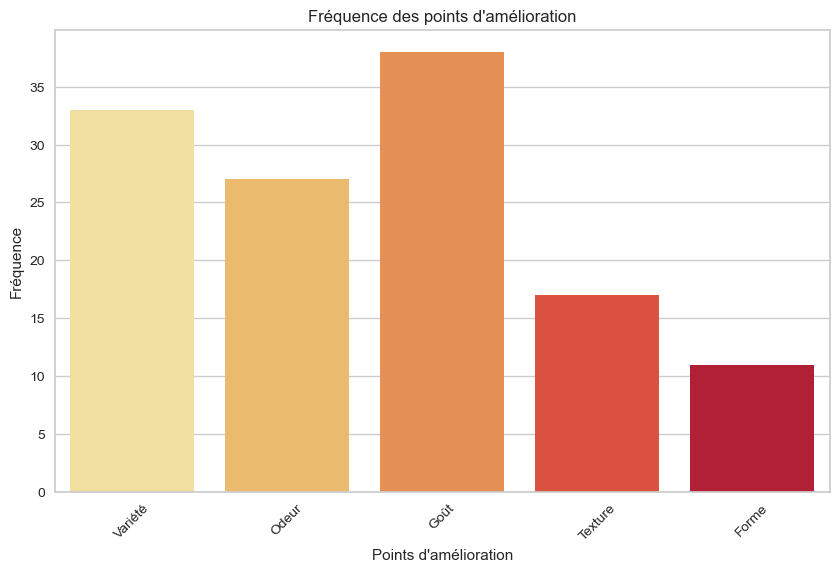

In [1832]:
plt.figure(figsize=(10, 6))
sns.countplot(data=warda_df, x='Points_Amelioration', palette='YlOrRd')
plt.title("Fréquence des points d'amélioration")
plt.xlabel("Points d'amélioration")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()


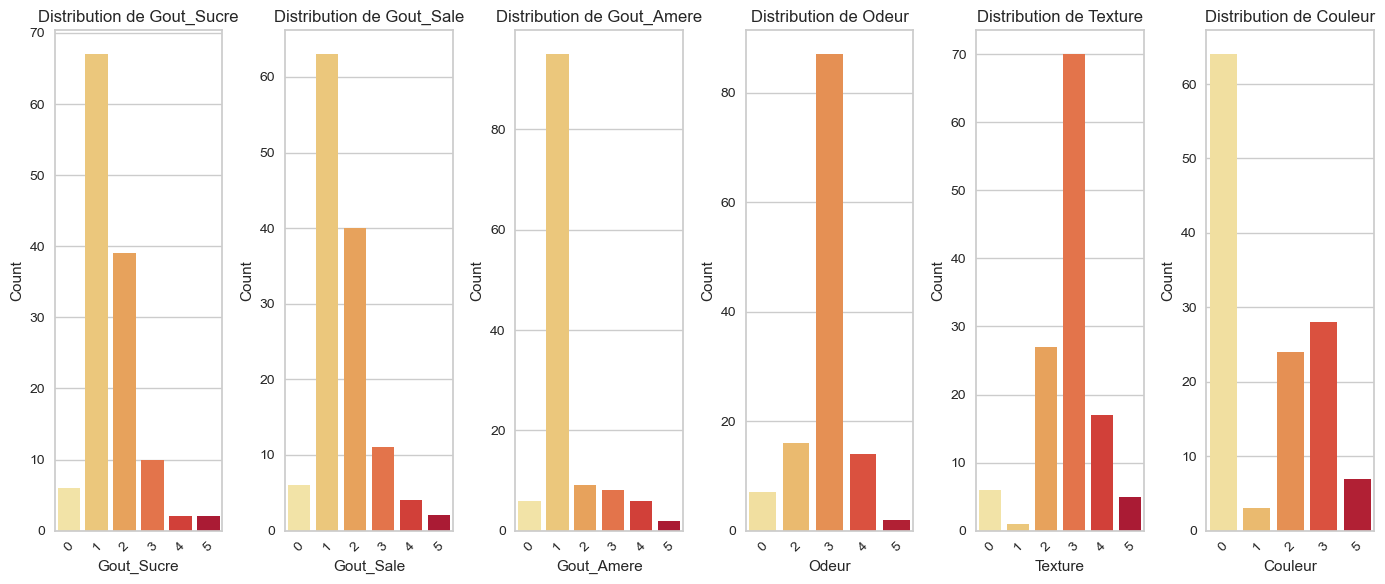

In [1833]:

colors = 'YlOrRd'


plt.figure(figsize=(14, 6))


for i, col in enumerate(warda_df_Sens):
    plt.subplot(1, len(warda_df_Sens), i+1)
    sns.countplot(data=warda_df, x=col, palette=colors)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


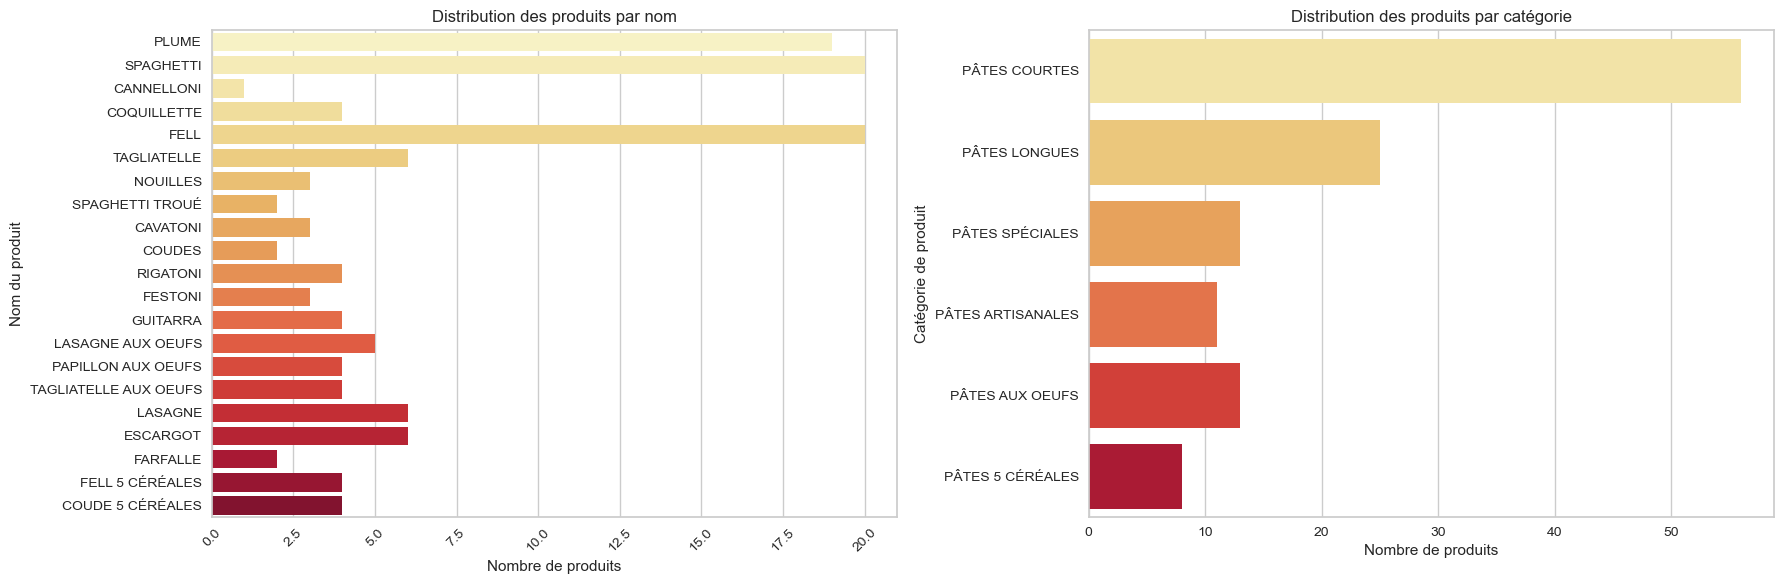

In [1834]:

plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
sns.countplot(data=warda_df, y='product_name', palette='YlOrRd')
plt.title("Distribution des produits par nom")
plt.xlabel("Nombre de produits")
plt.ylabel("Nom du produit")
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.countplot(data=warda_df, y='Product_Categorie', palette='YlOrRd')
plt.title("Distribution des produits par catégorie")
plt.xlabel("Nombre de produits")
plt.ylabel("Catégorie de produit")


plt.tight_layout()


plt.show()


<Figure size 1200x800 with 0 Axes>

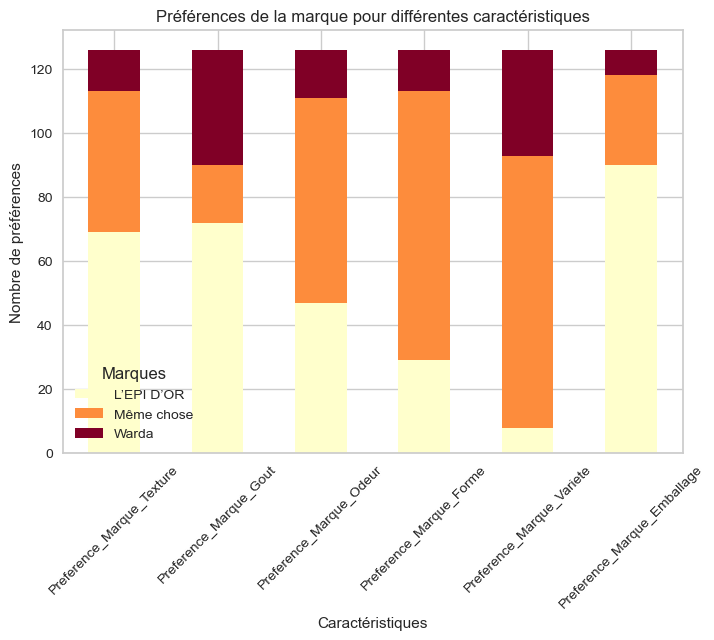

In [1835]:
import matplotlib.pyplot as plt
import seaborn as sns


variables_preference_marque = ['Preference_Marque_Texture', 'Preference_Marque_Gout', 
                               'Preference_Marque_Odeur', 'Preference_Marque_Forme', 
                               'Preference_Marque_Variete', 'Preference_Marque_Emballage']


df_preference_marque = warda_df[variables_preference_marque]


preference_counts = df_preference_marque.apply(pd.Series.value_counts)


preference_counts = preference_counts.T


plt.figure(figsize=(12, 8))


preference_counts.plot(kind='bar', stacked=True, colormap='YlOrRd')


plt.title("Préférences de la marque pour différentes caractéristiques")
plt.xlabel("Caractéristiques")
plt.ylabel("Nombre de préférences")
plt.xticks(rotation=45)
plt.legend(title='Marques')


plt.show()


##### Bivariate analysis

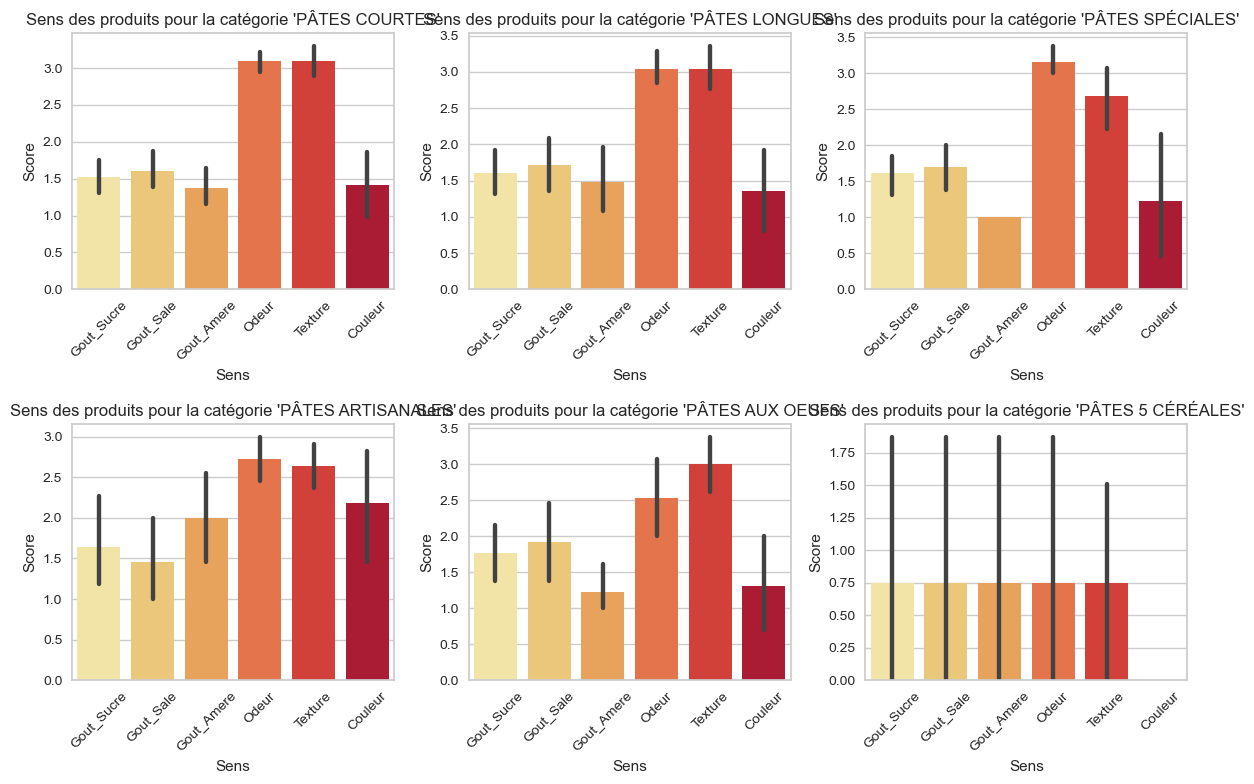

In [1836]:
import seaborn as sns
import matplotlib.pyplot as plt


variables_sens = ['Gout_Sucre', 'Gout_Sale', 'Gout_Amere', 'Odeur', 'Texture', 'Couleur']


df_sens = warda_df[['Product_Categorie'] + variables_sens]


df_sens_long = df_sens.melt(id_vars='Product_Categorie', var_name='Sens', value_name='Score')


plt.figure(figsize=(12, 8))


for i, category in enumerate(df_sens_long['Product_Categorie'].unique(), 1):
    plt.subplot(2, 3, i)  # Créer un sous-graphique dans une disposition de 2 lignes par 3 colonnes
    sns.barplot(data=df_sens_long[df_sens_long['Product_Categorie'] == category], x='Sens', y='Score', palette='YlOrRd')
    plt.title(f"Sens des produits pour la catégorie '{category}'")
    plt.xlabel("Sens")
    plt.ylabel("Score")
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


- Selecting Variables: The list variables_sens contains the sensory variables ('Gout_Sucre', 'Gout_Sale', 'Gout_Amere', 'Odeur', 'Texture', 'Couleur') to be included in the analysis.
- Creating Subset: The DataFrame warda_df is subsetted to include only the product category and the selected sensory variables.
- Reshaping Data: The DataFrame is reshaped into long format using the melt() function. This transformation makes it easier to visualize the data.
- Plotting: For each product category, a bar plot is created to show the average scores for each sensory variable. The x-axis represents the sensory variables, the y-axis represents the scores, and each bar corresponds to a sensory variable.
- Adjusting Layout: The layout of subplots is adjusted to prevent overlapping using plt.tight_layout().
Display: Finally, the plots are displayed using plt.show().

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ordered_categories = {
    'categorie_socio_professionnel': ['Élève','Étudiant(e)','Sans emploi', 'Employé(e)', 'Retraité(e)'],
    'Tranche_Age': ['Moins de 18 ans', '18-25ans', '25-35 ans', '36-50 ans', '50 ans et plus'],
    'Sexe': ['Femme', 'Homme'],
    'Preference_Marque_Texture': ['Même chose','Warda', "L'EPI D'OR"],
    'Preference_Marque_Gout': ['Même chose','Warda', "L'EPI D'OR"],
    'Preference_Marque_Odeur': ['Même chose','Warda', "L'EPI D'OR"],
    'Preference_Marque_Forme': ['Même chose','Warda', "L'EPI D'OR"],
    'Preference_Marque_Variete': ['Même chose','Warda', "L'EPI D'OR"],
    'Preference_Marque_Emballage': ['Même chose','Warda', "L'EPI D'OR"],
     'Critere_1_plus_important':['Forme','Texture','Goût','Valeur nutritive'], 
     'Critere_2_plus_important':['Forme','Texture','Goût','Valeur nutritive'],
    'Critere_3_plus_important':['Forme','Texture','Goût','Valeur nutritive'],
    'Critere_4_plus_important':['Forme','Texture','Goût','Valeur nutritive'],
    'Critere_5_plus_important':['Forme','Texture','Goût','Valeur nutritive'],
    'Points_Amelioration':['Variété' 'Odeur' 'Goût' 'Texture' 'Forme'],
    'Design_emballage':['Insatisfaisant','Moyen','Bon','Excellent'], 
    'Praticite_emballage':[ 'Insatisfaisant','Moyen','Bon','Excellent'],
    'Information_emballage':['Insatisfaisant','Moyen','Bon','Excellent'], 
    'Protection_emballage':['Insatisfaisant','Moyen','Bon','Excellent'], 
    'Emballage_ecologique':[ 'Insatisfaisant','Moyen','Bon','Excellent'], 
    'Paiement_Emballage':['Non','Peut-être','Oui'], 
    'Package':['SACHET PLASTIQUE','CARTON'],
    'Product_Categorie':['PÂTES COURTES' 'PÂTES LONGUES' 'PÂTES SPÉCIALES' 'PÂTES ARTISANALES'
 'PÂTES AUX OEUFS' 'PÂTES 5 CÉRÉALES']

}
categorical_columns = ['Name_brand', 'categorie_socio_professionnel', 'Tranche_Age', 'Sexe', 'Preference_Marque_Texture', 
                       'Preference_Marque_Gout', 'Preference_Marque_Odeur', 'Preference_Marque_Forme', 
                       'Preference_Marque_Variete', 'Preference_Marque_Emballage', 'Critere_1_plus_important', 
                       'Critere_2_plus_important', 'Critere_3_plus_important', 'Critere_4_plus_important', 
                       'Critere_5_plus_important', 'Points_Amelioration', 'Design_emballage', 'Praticite_emballage', 
                       'Information_emballage', 'Protection_emballage', 'Emballage_ecologique', 'Paiement_Emballage', 'Product_Categorie', 'Package']


ordinal_encoder = OrdinalEncoder(categories=ordered_categories)


warda_df[categorical_columns] = ordinal_encoder.fit_transform(warda_df[categorical_columns])

## Feature Encoding 

In [ ]:
cat_cols = categorical_columns

  
for col in cat_cols:
    categories = warda_df[col].unique()
    
    print(f"\nColonne : {col}")
    print("Catégories originales :")
    print(categories)

In [1837]:
warda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 128
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gout_Sucre                     126 non-null    int64  
 1   Gout_Sale                      126 non-null    int64  
 2   Gout_Amere                     126 non-null    int64  
 3   energy_kj_value                126 non-null    int64  
 4   carbohydrates_value_g          126 non-null    float64
 5   Odeur                          126 non-null    int64  
 6   Texture                        126 non-null    int64  
 7   Couleur                        126 non-null    int64  
 8   fat_value_g                    126 non-null    float64
 9   proteins_value_g               126 non-null    float64
 10  Name_brand                     126 non-null    object 
 11  categorie_socio_professionnel  126 non-null    object 
 12  Tranche_Age                    126 non-null    object 


In [1838]:

cat_cols = warda_df.select_dtypes(include=['object']).columns


for col in cat_cols:
    
    categories = warda_df[col].dropna().unique()
    
    
    print(f"\nColonne : {col}")
    print("Catégories originales :")
    print(categories)



Colonne : Name_brand
Catégories originales :
["Epi d' Or" 'Warda']

Colonne : categorie_socio_professionnel
Catégories originales :
['Étudiant(e)' 'Employé(e)' 'Retraité(e)' 'Sans emploi' 'Élève']

Colonne : Tranche_Age
Catégories originales :
['25-35 ans' '18-25ans' '36-50 ans' '50 ans et plus' 'Moins de 18 ans']

Colonne : Sexe
Catégories originales :
['Femme' 'Homme']

Colonne : Preference_Marque_Texture
Catégories originales :
['Même chose' 'L’EPI D’OR' 'Warda']

Colonne : Preference_Marque_Gout
Catégories originales :
['Warda' 'L’EPI D’OR' 'Même chose']

Colonne : Preference_Marque_Odeur
Catégories originales :
['Même chose' 'L’EPI D’OR' 'Warda']

Colonne : Preference_Marque_Forme
Catégories originales :
['Même chose' 'L’EPI D’OR' 'Warda']

Colonne : Preference_Marque_Variete
Catégories originales :
['Même chose' 'L’EPI D’OR' 'Warda']

Colonne : Preference_Marque_Emballage
Catégories originales :
['Même chose' 'L’EPI D’OR' 'Warda']

Colonne : Critere_1_plus_important
Catégories o

- Looping Through Categorical Columns: The code iterates through each column identified as categorical using the select_dtypes method, specifically selecting those of type 'object'.
- Extracting Unique Categories: For each categorical column, the code retrieves the unique categories using the unique method. This ensures that we capture all unique values present in that column.
- Printing Categories: The code then prints the column name and its corresponding unique categories.
- Interpretation: This output provides insight into the original categories present in each categorical column before encoding. Understanding these original categories is crucial for interpreting the encoded data and retaining the context of the features

In [1839]:
import pandas as pd


warda_df['Name_brand'] = warda_df['Name_brand'].replace("Epi d' Or", "L’EPI D’OR", inplace=True)


This operation is likely performed to ensure consistency in the data, ensuring that all occurrences of "Epi d' Or" are represented uniformly as "L’EPI D’OR" in the 'Name_brand' column.

In [1840]:

from sklearn.preprocessing import OrdinalEncoder


ordered_categories = {
    'categorie_socio_professionnel': ['Élève', 'Étudiant(e)', 'Sans emploi', 'Employé(e)', 'Retraité(e)'],
    'Tranche_Age': ['Moins de 18 ans', '18-25ans', '25-35 ans', '36-50 ans', '50 ans et plus'],
    'Critere_1_plus_important':['Texture','Forme','Valeur nutritive','Goût','Odeur'],
    'Critere_2_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],
    'Critere_3_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],
    'Critere_4_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],
    'Critere_5_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],
    'Sexe': ['Femme', 'Homme'],
    'Emballage_ecologique': ['Oui','Peut-être','Non'],
    'Paiement_Emballage': ['Non', 'Peut-être', 'Oui']

    
}


categorical_columns = ['categorie_socio_professionnel', 'Tranche_Age', 'Sexe','Emballage_ecologique', 'Paiement_Emballage',
                      'Critere_1_plus_important','Critere_2_plus_important',
                      'Critere_3_plus_important','Critere_4_plus_important','Critere_5_plus_important']





from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder(categories=[ordered_categories[col] for col in categorical_columns])


encoded_categories = ordinal_encoder.fit_transform(warda_df[categorical_columns])


warda_df[categorical_columns] = encoded_categories


print(warda_df.head())



  #  'Critere_2_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],
 #   'Critere_3_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],
  #  'Critere_4_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],
  #  'Critere_5_plus_important': ['Texture','Forme','Valeur nutritive','Goût','Odeur'],


   Gout_Sucre  Gout_Sale  Gout_Amere  energy_kj_value  carbohydrates_value_g  \
0           3          2           2             1485                   73.0   
1           2          4           1             1485                   73.0   
2           1          1           1             1485                   73.0   
3           2          3           1             1485                   73.0   
4           1          1           1             1485                   73.0   

   Odeur  Texture  Couleur  fat_value_g  proteins_value_g  ...  \
0      2        3        3          1.9              12.5  ...   
1      3        4        3          1.9              12.5  ...   
2      3        4        2          1.9              12.5  ...   
3      4        1        0          1.9              12.5  ...   
4      3        3        3          1.9              12.5  ...   

  Praticite_emballage  Information_emballage  Protection_emballage  \
0      Insatisfaisant         Insatisfaisant        

- Natural Order: The categorical variables such as 'categorie_socio_professionnel', 'Tranche_Age', 'Critere_1_plus_important', etc., represent attributes with inherent ordering or hierarchy. For example:
'Tranche_Age': Represents age groups, where there is a clear order from younger age groups to older age groups.
'Critere_1_plus_important', 'Critere_2_plus_important', etc.: Represent the importance of different criteria, where there is a predefined order of importance.
- Maintains Order: Ordinal encoding assigns a unique integer value to each category in a way that preserves their order. This ensures that the encoded values reflect the inherent hierarchy present in the categories.
- Efficient Representation: Ordinal encoding is efficient in terms of memory usage and computational complexity compared to other encoding techniques like one-hot encoding. It replaces the categorical values with integers, reducing the dimensionality of the data while still capturing the ordinal relationships.
- Interpretability: The encoded values retain the ordinal relationship between categories, making them interpretable. For example, higher encoded values represent categories that are considered "higher" or "more important" based on the predefined order.
- Applicability: Ordinal encoding is appropriate when the categorical variables exhibit a clear and meaningful order, which is the case for the variables in this dataset.

### Ordinal encoding technique
#### Define the categorical columns to be encoded
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['Name_brand', 'categorie_socio_professionnel', 'Tranche_Age', 'Sexe', 'Preference_Marque_Texture', 
                       'Preference_Marque_Gout', 'Preference_Marque_Odeur', 'Preference_Marque_Forme', 
                       'Preference_Marque_Variete', 'Preference_Marque_Emballage', 'Critere_1_plus_important', 
                       'Critere_2_plus_important', 'Critere_3_plus_important', 'Critere_4_plus_important', 
                       'Critere_5_plus_important', 'Points_Amelioration', 'Design_emballage', 'Praticite_emballage', 
                       'Information_emballage', 'Protection_emballage', 'Emballage_ecologique', 'Paiement_Emballage','Package','Product_Categorie']

### Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

### Encode the categorical columns
warda_df[categorical_columns] = ordinal_encoder.fit_transform(warda_df[categorical_columns])

### Display the encoded DataFrame
print("Encoded DataFrame:")
warda_df.head(40)

In [1841]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


cols_to_encode = ['Product_Categorie']


one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')


encoded_cols = one_hot_encoder.fit_transform(warda_df[cols_to_encode])


categories = [warda_df[col].unique() for col in cols_to_encode]


encoded_col_names = []
for i, col in enumerate(cols_to_encode):
    for category in categories[i]:
        encoded_col_names.append(f"{col}_{category}")


warda_encoded = pd.DataFrame(encoded_cols, columns=encoded_col_names, index=warda_df.index)


warda_df = pd.concat([warda_df, warda_encoded], axis=1)


warda_df.drop(cols_to_encode, axis=1, inplace=True)


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- Selection of Columns: We select the column 'Product_Categorie' as the one to be encoded.
- One-Hot Encoder: We create an instance of the OneHotEncoder class from scikit-learn. We specify sparse=False to get a dense array instead of a sparse matrix and handle_unknown='ignore' to handle unseen categories during transformation.
- Fitting and Transformation: We fit the one-hot encoder to the selected column and transform it, obtaining a binary array where each row corresponds to an instance and each column represents a unique category.
- Getting Category Names: We retrieve the unique category names from the original column 'Product_Categorie'.
- Creating Encoded Column Names: We create a list of column names for the encoded columns by combining the original column name ('Product_Categorie') with each unique category name.
- Creating Encoded DataFrame: We create a new DataFrame (warda_encoded) using the encoded columns and the generated column names. This DataFrame contains binary representations of each category.
- Concatenation: We concatenate the original DataFrame (warda_df) with the encoded DataFrame (warda_encoded) along the columns axis.
- Drop Original Columns: Finally, we drop the original column 'Product_Categorie' from the DataFrame since it's no longer needed.

In [1842]:
warda_df

,Gout_Sucre,Gout_Sale,Gout_Amere,energy_kj_value,carbohydrates_value_g,Odeur,Texture,Couleur,fat_value_g,proteins_value_g,...,product_name,Package,Eco_Score,Region,Product_Categorie_PÂTES COURTES,Product_Categorie_PÂTES LONGUES,Product_Categorie_PÂTES SPÉCIALES,Product_Categorie_PÂTES ARTISANALES,Product_Categorie_PÂTES AUX OEUFS,Product_Categorie_PÂTES 5 CÉRÉALES
0,3,2,2,1485,73.0,2,3,3,1.90,12.50,...,PLUME,SACHET PLASTIQUE,65,TUNIS,0.0,0.0,0.0,1.0,0.0,0.0
1,2,4,1,1485,73.0,3,4,3,1.90,12.50,...,SPAGHETTI,SACHET PLASTIQUE,65,SOUSSE,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,1,1485,73.0,3,4,2,1.90,12.50,...,SPAGHETTI,SACHET PLASTIQUE,65,BEN AROUS,0.0,0.0,0.0,0.0,1.0,0.0
3,2,3,1,1485,73.0,4,1,0,1.90,12.50,...,CANNELLONI,CARTON,73,JENDOUBA,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,1,1485,73.0,3,3,3,1.90,12.50,...,COQUILLETTE,SACHET PLASTIQUE,65,NABEUL,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,1,1,1519,72.0,3,3,0,1.50,12.00,...,FELL,SACHET PLASTIQUE,65,MONASTIR,0.0,0.0,0.0,1.0,0.0,0.0
125,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,FELL 5 CÉRÉALES,SACHET PLASTIQUE,60,KEBILI,1.0,0.0,0.0,0.0,0.0,0.0
126,3,3,3,1447,73.1,3,3,0,0.84,11.59,...,COUDE 5 CÉRÉALES,SACHET PLASTIQUE,60,SILIANA,1.0,0.0,0.0,0.0,0.0,0.0
127,0,0,0,1447,73.1,0,0,0,0.84,11.59,...,COUDE 5 CÉRÉALES,SACHET PLASTIQUE,60,BEN AROUS,1.0,0.0,0.0,0.0,0.0,0.0


In [1843]:
warda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 128
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gout_Sucre                           126 non-null    int64  
 1   Gout_Sale                            126 non-null    int64  
 2   Gout_Amere                           126 non-null    int64  
 3   energy_kj_value                      126 non-null    int64  
 4   carbohydrates_value_g                126 non-null    float64
 5   Odeur                                126 non-null    int64  
 6   Texture                              126 non-null    int64  
 7   Couleur                              126 non-null    int64  
 8   fat_value_g                          126 non-null    float64
 9   proteins_value_g                     126 non-null    float64
 10  Name_brand                           0 non-null      object 
 11  categorie_socio_professionnel        

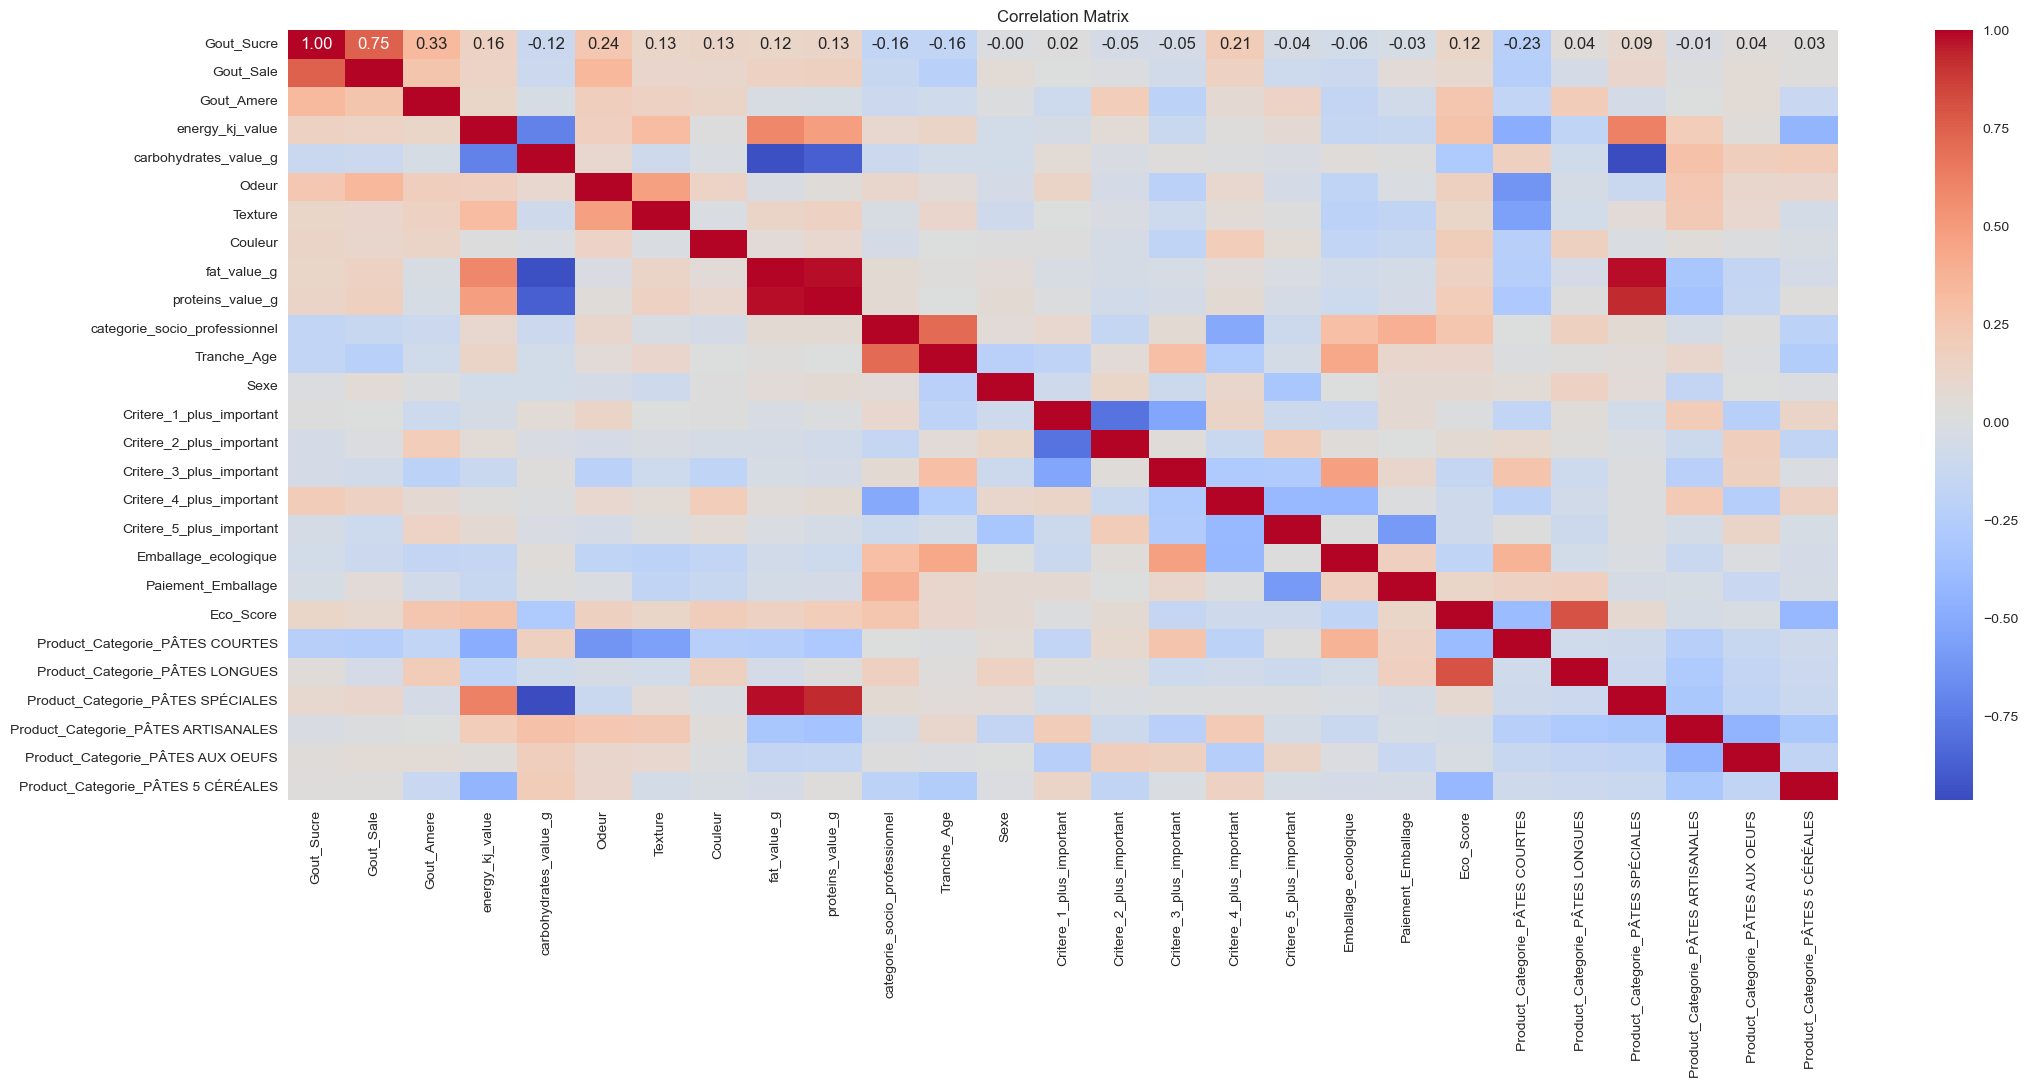

In [1844]:
numeric_df = warda_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In this problem, there are many factors on the basis of which the final classification will be done. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why we will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.
Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.


- Simplicity: PCA simplifies the dataset by reducing the number of features. Instead of dealing with many correlated features, we can work with a smaller set of uncorrelated principal components.
- Interpretability: The principal components are combinations of the original features, so they might be easier to understand and interpret.
- Computational Efficiency: Working with fewer dimensions speeds up computation, especially for machine learning algorithms.
- Reducing Noise: PCA can help remove noise or irrelevant information from the dataset, making it more robust.

selected_variables = ['categorie_socio_professionnel', 'Tranche_Age', 'Sexe', 'Critere_1_plus_important', 
                      'Points_Amelioration', 'Design_emballage', 'Praticite_emballage', 
                      'Information_emballage', 'Protection_emballage', 'Emballage_ecologique', 'Paiement_Emballage', 
                      'product_name', 'Product_Categorie', 'Package', 'Region','Gout_Sucre','Gout_Sale','Gout_Amere','Odeur','Texture','Couleur']

df_selected = warda_df[selected_variables]

df_selected.head()

In [1845]:
selected_variables = ['categorie_socio_professionnel', 'Tranche_Age', 'Sexe', 'Emballage_ecologique', 'Paiement_Emballage','Gout_Sucre',
                      'Gout_Sale','Gout_Amere','Odeur','Texture','Couleur',
                      'Product_Categorie_PÂTES COURTES', 'Product_Categorie_PÂTES LONGUES','Product_Categorie_PÂTES SPÉCIALES',
                      'Product_Categorie_PÂTES ARTISANALES','Product_Categorie_PÂTES AUX OEUFS', 'Product_Categorie_PÂTES 5 CÉRÉALES',
                      'Critere_1_plus_important']

df_selected = warda_df[selected_variables]


- Socio-demographic variables: These include 'categorie_socio_professionnel', 'Tranche_Age', and 'Sexe', which provide insights into the social and demographic profiles of the consumers.
- Product attributes: These are 'Gout_Sucre', 'Gout_Sale', 'Gout_Amere', 'Odeur', 'Texture', and 'Couleur', which describe the sensory characteristics of the product.
- Product categories: The variables starting with 'Product_Categorie' represent different categories of the product, such as 'PÂTES COURTES', 'PÂTES LONGUES', etc. This helps categorize the products based on their type.
- Importance criteria: The variable 'Critere_1_plus_important' indicates the most important criteria considered by consumers when evaluating the product.

By selecting these variables, you're focusing on key aspects that can influence consumer preferences and choices. This subset will likely be more manageable and meaningful for further analysis

In [1846]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 128
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   categorie_socio_professionnel        126 non-null    float64
 1   Tranche_Age                          126 non-null    float64
 2   Sexe                                 126 non-null    float64
 3   Emballage_ecologique                 126 non-null    float64
 4   Paiement_Emballage                   126 non-null    float64
 5   Gout_Sucre                           126 non-null    int64  
 6   Gout_Sale                            126 non-null    int64  
 7   Gout_Amere                           126 non-null    int64  
 8   Odeur                                126 non-null    int64  
 9   Texture                              126 non-null    int64  
 10  Couleur                              126 non-null    int64  
 11  Product_Categorie_PÂTES COURTES      

## Feature selection

In [1847]:

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(df_selected)

pca.components_


array([[ 2.66999437e-01,  2.30499176e-01, -7.25982839e-03,
         1.56489661e-01,  1.90321608e-01, -2.66539258e-01,
        -2.73194942e-01, -2.26555092e-01, -1.86230828e-01,
        -1.14352913e-01, -7.49461243e-01,  6.16488742e-02,
        -1.49573418e-02,  1.49237339e-03, -2.51576846e-02,
        -1.03590885e-02, -1.26671327e-02, -5.85974494e-02],
       [-5.31028590e-01, -5.57434962e-01,  1.92150260e-02,
        -1.33973291e-01, -1.60282940e-01,  1.42307244e-01,
         1.62723131e-01,  6.86991314e-02, -5.93528910e-02,
         9.57815301e-03, -5.49646623e-01,  7.98801665e-03,
        -3.59248700e-02, -2.73986547e-03, -1.53285083e-02,
         6.91971958e-04,  4.53132552e-02,  4.93955150e-02],
       [-3.03358636e-01, -1.08166557e-01,  2.87470159e-02,
         1.48326821e-02, -2.38226324e-01, -2.88357628e-01,
        -3.45133665e-01, -1.41948020e-01, -4.04603307e-01,
        -3.24507752e-01,  2.71425173e-01,  7.83115926e-02,
        -4.20605315e-03,  1.90101557e-04, -9.31384455e

- Each row represents a principal component, which is a linear combination of the original features.
- The values in each row indicate the contribution of each original feature to that principal component.
- The higher the absolute value of a coefficient, the more significant the contribution of the corresponding feature to that principal component.
- Principal components are ordered by their importance, with the first component explaining the most variance in the data, followed by the second component, and so on.

In [1848]:
# Analyze the variance ratios of each features
pca.explained_variance_ratio_

array([2.11456623e-01, 1.65302171e-01, 1.34983919e-01, 1.27637825e-01,
       9.64823529e-02, 5.77280111e-02, 5.61109393e-02, 3.30704683e-02,
       2.86754409e-02, 2.31456032e-02, 1.82191843e-02, 1.44295184e-02,
       1.08345076e-02, 7.58071597e-03, 6.54308027e-03, 5.47252894e-03,
       2.32711071e-03, 4.87376605e-36])

- The first value, approximately 0.211, indicates that the first principal component explains approximately 21.1% of the total variance in the dataset.
- The second value, approximately 0.165, indicates that the second principal component explains approximately 16.5% of the total variance.
- Similarly, the third value, approximately 0.135, indicates that the third principal component explains approximately 13.5% of the total variance, and so on.

In [1849]:
# Calculate cumulative explained variance ratios
cumulative_variance_ratios = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative explained variance ratios
for i, ratio in enumerate(cumulative_variance_ratios):
    print(f"Cumulative Explained Variance Ratio for {i+1} components: {ratio:.2f}")


Cumulative Explained Variance Ratio for 1 components: 0.21
Cumulative Explained Variance Ratio for 2 components: 0.38
Cumulative Explained Variance Ratio for 3 components: 0.51
Cumulative Explained Variance Ratio for 4 components: 0.64
Cumulative Explained Variance Ratio for 5 components: 0.74
Cumulative Explained Variance Ratio for 6 components: 0.79
Cumulative Explained Variance Ratio for 7 components: 0.85
Cumulative Explained Variance Ratio for 8 components: 0.88
Cumulative Explained Variance Ratio for 9 components: 0.91
Cumulative Explained Variance Ratio for 10 components: 0.93
Cumulative Explained Variance Ratio for 11 components: 0.95
Cumulative Explained Variance Ratio for 12 components: 0.97
Cumulative Explained Variance Ratio for 13 components: 0.98
Cumulative Explained Variance Ratio for 14 components: 0.99
Cumulative Explained Variance Ratio for 15 components: 0.99
Cumulative Explained Variance Ratio for 16 components: 1.00
Cumulative Explained Variance Ratio for 17 compon

- For each component count, the cumulative explained variance ratio is calculated by summing up the variance ratios of all the principal components up to that component count.
- The cumulative explained variance ratio for 1 component is approximately 0.21, meaning that including only the first principal component explains about 21% of the total variance in the dataset.
##### As we include more components, the cumulative explained variance ratio increases. For example, including 2 components explains approximately 38% of the total variance, including 3 components explains approximately 51%, and so on.
##### By the time we reach 18 components, the cumulative explained variance ratio reaches 100%, indicating that all of the variance in the dataset is explained by including all 18 principal components.

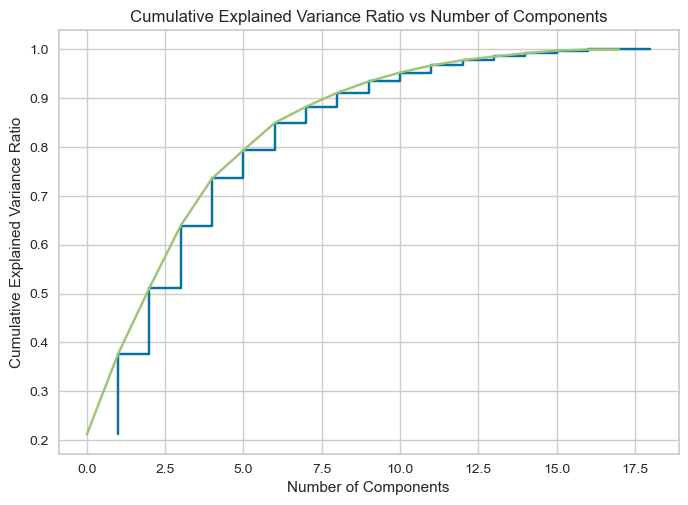

In [1850]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x-axis values
num_components = len(pca.explained_variance_ratio_)
x_values = np.arange(1, num_components + 1)

# Plot cumulative sum of explained variance ratios
plt.step(x_values, np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.show()


This is a very effective method where we add up the variances of all the features in cummulative format.
Typically eigen values with more than 80% of ratio of variance are selected.
They correspond to the columns of the PCA generated dataframe.
In this case, we select the Eigen Value : 5 as the steps generated have significant variances and thus the other features get dominated by their variances.



We observed 5 components describe 80% of information; hence we will select the 5 components.

In [1851]:
colnames = list(df_selected.columns)
prinComp_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[6],'PC7':pca.components_[7],'PC8':pca.components_[8],'PC9':pca.components_[9]})
prinComp_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,categorie_socio_professionnel,0.266999,-0.531029,-0.303359,0.020876,0.103568,0.101656,0.284009,-0.409262,-0.139644
1,Tranche_Age,0.230499,-0.557435,-0.108167,0.256450,-0.138005,0.313274,-0.169177,0.220223,-0.131100
2,Sexe,-0.007260,0.019215,0.028747,0.002421,0.089711,-0.096306,0.184110,-0.365284,0.205880
3,Emballage_ecologique,0.156490,-0.133973,0.014833,0.063797,0.130889,0.214250,-0.192528,0.277266,0.789518
4,Paiement_Emballage,0.190322,-0.160283,-0.238226,-0.077235,0.539441,-0.652526,-0.286468,0.121401,0.019189
5,Gout_Sucre,-0.266539,0.142307,-0.288358,0.227942,0.303816,0.296651,-0.229346,-0.059359,-0.036296
6,Gout_Sale,-0.273195,0.162723,-0.345134,0.235949,0.362462,0.109412,0.049130,-0.047912,-0.131843
7,Gout_Amere,-0.226555,0.068699,-0.141948,0.292169,0.079279,0.220082,0.022938,0.056754,0.073841
8,Odeur,-0.186231,-0.059353,-0.404603,0.146351,-0.230340,-0.292239,0.605072,0.379950,0.188935
9,Texture,-0.114353,0.009578,-0.324508,0.252940,-0.574667,-0.303115,-0.493463,-0.319992,0.140825


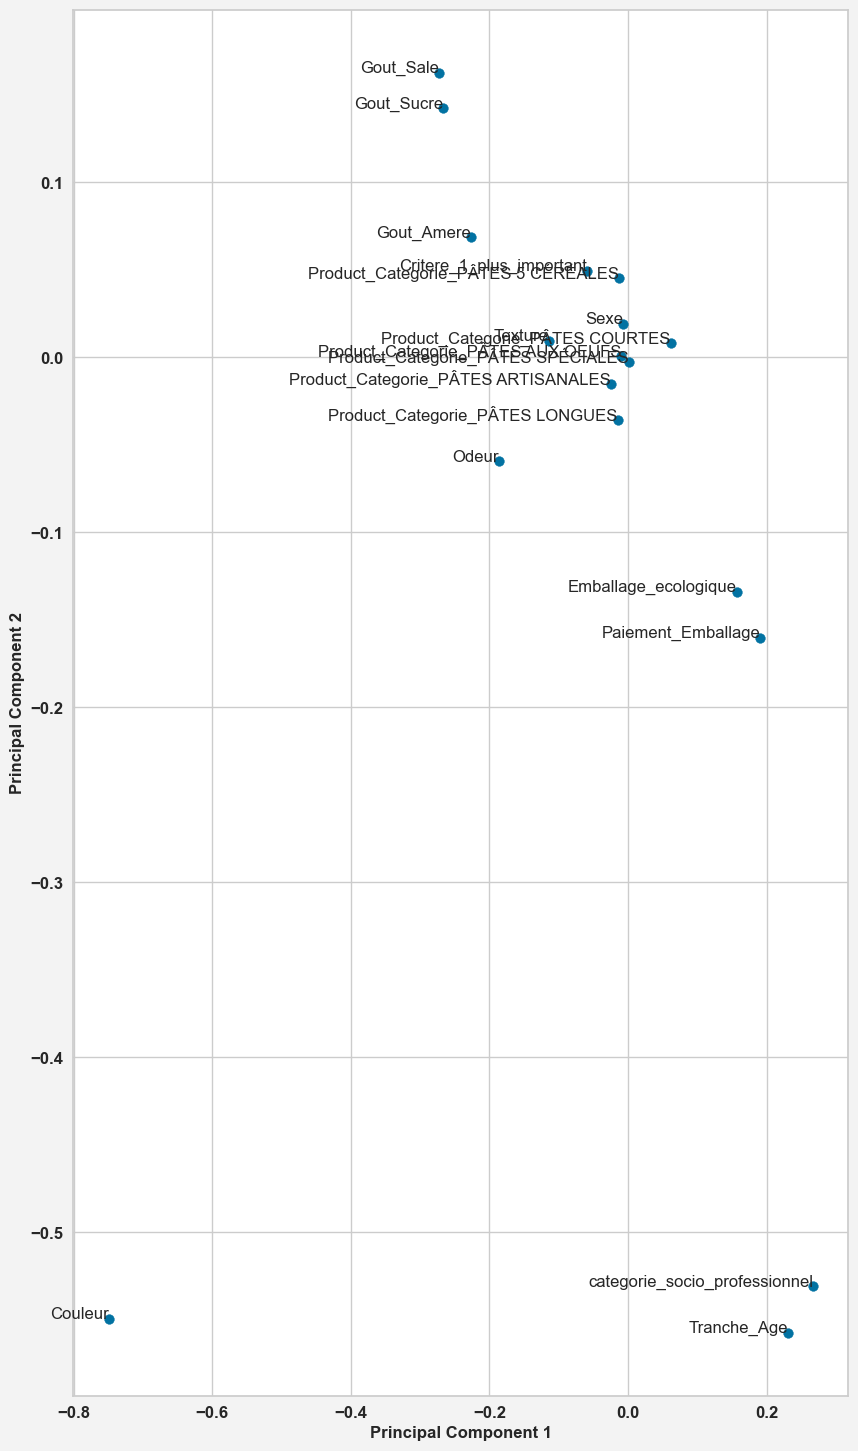

In [1852]:
# Visualize the first two principal components
fig = plt.figure(figsize = (10,18))
fig.set_facecolor("#F3F3F3")
plt.scatter(prinComp_df.PC1, prinComp_df.PC2)
plt.xlabel('Principal Component 1',fontsize=12, fontweight='bold')
plt.ylabel('Principal Component 2',fontsize=12, fontweight='bold')
for i, txt in enumerate(prinComp_df.Feature):
    plt.annotate(txt, (prinComp_df.PC1[i],prinComp_df.PC2[i]),fontsize=12,  horizontalalignment='right')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

Performing Incremental PCA

In [1853]:
#Finally let's go ahead and do dimenstionality reduction using the Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [1854]:
df_pca = pca_final.fit_transform(df_selected_scaled)
df_pca.shape

(126, 5)

After fitting the Incremental PCA model to the scaled dataset, the transformed dataset df_pca is obtained by transforming the original dataset into its lower-dimensional representation using the selected principal components.

The resulting shape of df_pca indicates that the dataset now has 126 samples (rows) and 5 principal components (columns), effectively reducing the dimensionality of the original dataset while preserving as much variance as possible.

Creating a transpose so that the each column is properly arranged

In [1855]:
pc = np.transpose(df_pca)

Creating correlation matrix for the principal components

In [1856]:
corrmat = np.corrcoef(pc)

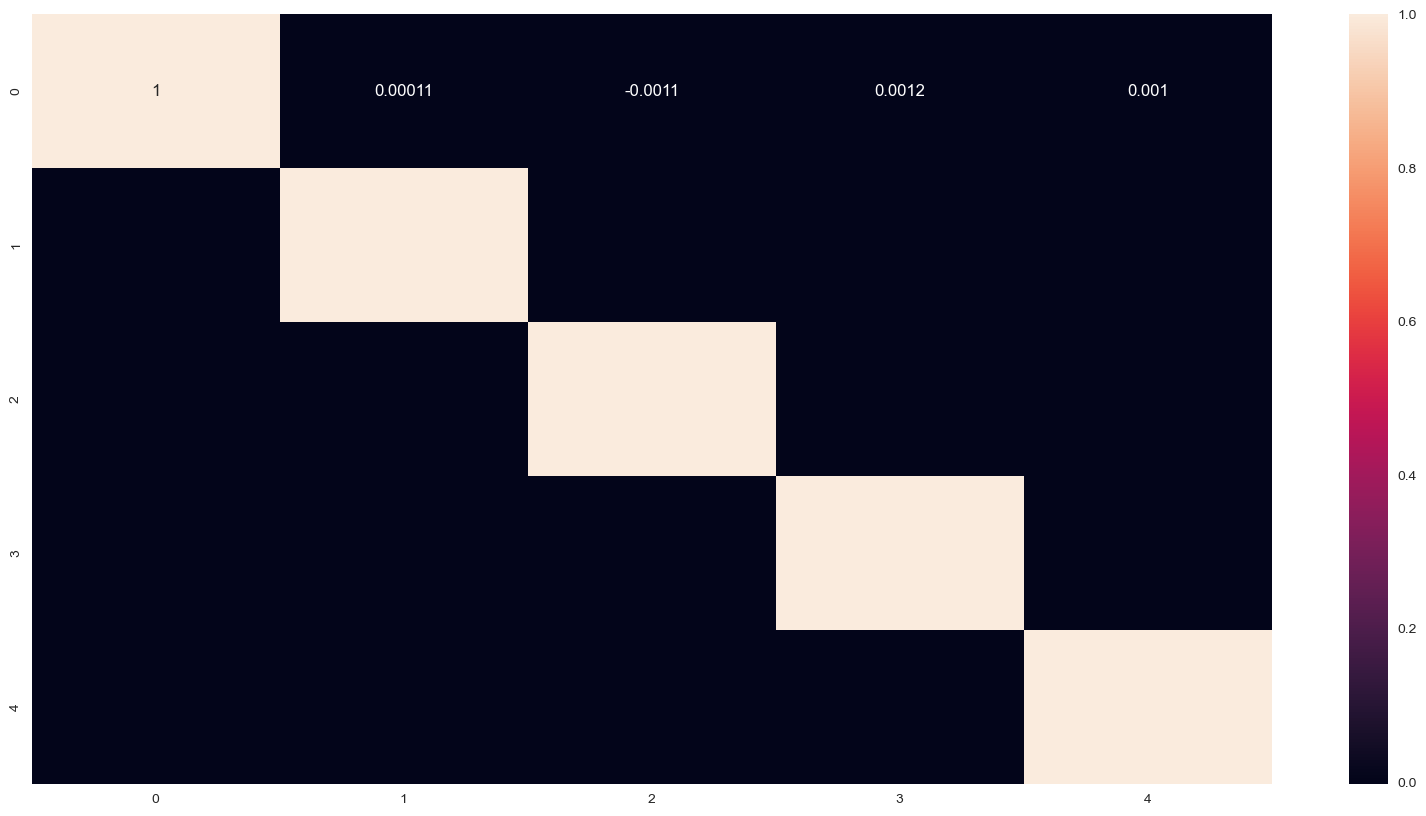

In [1857]:
#Plotting the correlation matrix of the principal components
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

From above heat map, we can see all the compnents are not correlated to each other.

Creating the dataframe of all 5 principal components

In [1858]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

Checking outliers of all the principal complnents

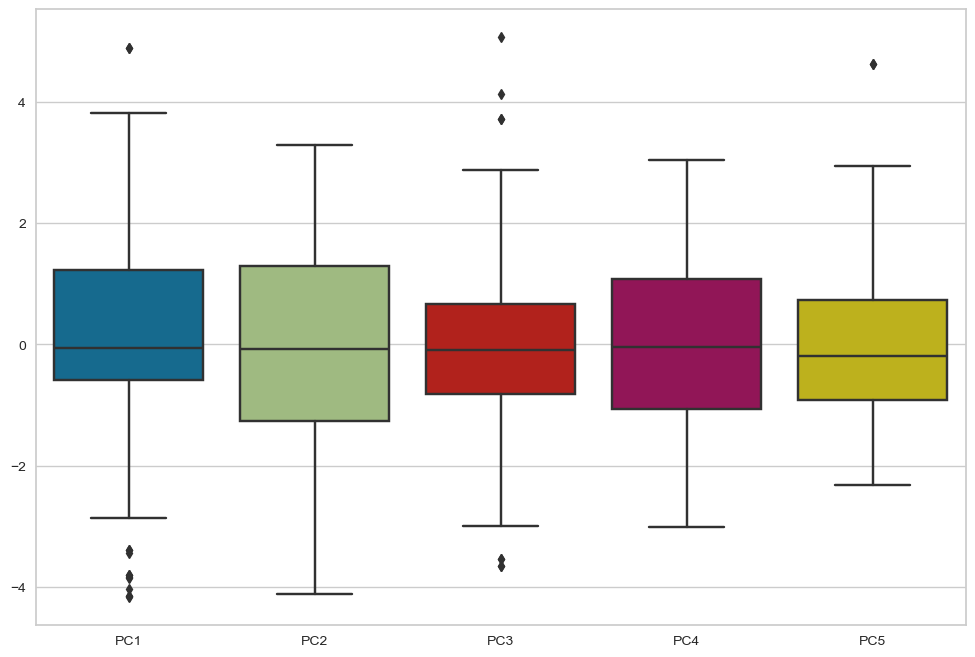

In [1859]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

From above boxplots, we can see the Outliers in the data, So we will do the outlier treatment below

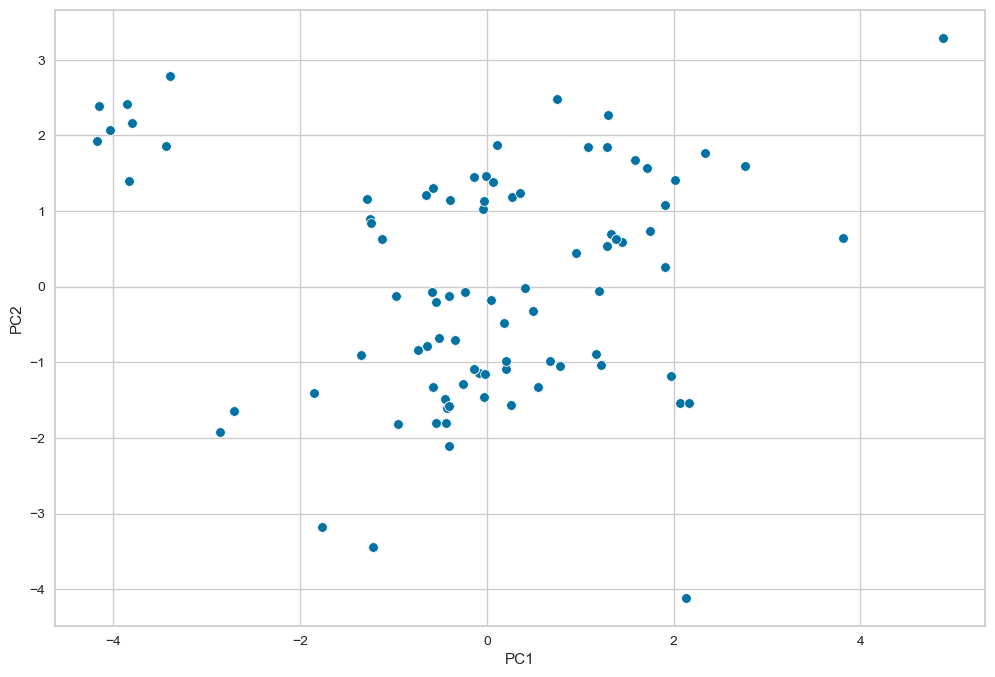

In [1860]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

## Clustering Process

The Hopkins statistic is a measure used to assess the clustering tendency of a dataset. It quantifies how likely the data points are to form meaningful clusters. The hypothesis testing associated with the Hopkins statistic involves two hypotheses:

Null Hypothesis (H0): It suggests that the dataset is not uniformly distributed and contains meaningful clusters.
Alternative Hypothesis (H1): It suggests that the dataset is uniformly distributed and does not contain meaningful clusters.
The criteria for interpreting the Hopkins statistic is as follows:

If the Hopkins statistic value falls between 0.7 and 0.99, it indicates a high tendency for clustering, and thus, we accept the null hypothesis (H0) that the dataset contains meaningful clusters.
Values closer to 1 indicate a stronger tendency for clustering, while values closer to 0 suggest a weaker clustering tendency.ter).


In [1861]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1862]:
pcs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     126 non-null    float64
 1   PC2     126 non-null    float64
 2   PC3     126 non-null    float64
 3   PC4     126 non-null    float64
 4   PC5     126 non-null    float64
dtypes: float64(5)
memory usage: 5.1 KB


Let's check the Hopkins measure

In [1863]:
hopkins(pcs_df2)

0.9035499348248782

The Hopkins statistic value of approximately 0.90 indicates a high tendency for clustering in the dataset pcs_df2. This suggests that the data points in the dataset are not uniformly distributed and are likely to form meaningful clusters.

Assigning pcs_df2 dataframe to a new variable

In [1864]:
dat3_1 = pcs_df2

## k-Means Clustering

Before implementing K-Means, the first step is to calculate the optimal number of clusters using
For the selection of values of k, we use 2 statistical tests :
- Elbow Method : It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k is the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
- Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the k value with highest score is selected for modeling.

### Elbow Method

Elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The optimal number of clusters can be defined as follow:

- Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
- For each k, calculate the total within-cluster sum of square (WSS).
- Plot the curve of wss according to the number of clusters k.
- The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

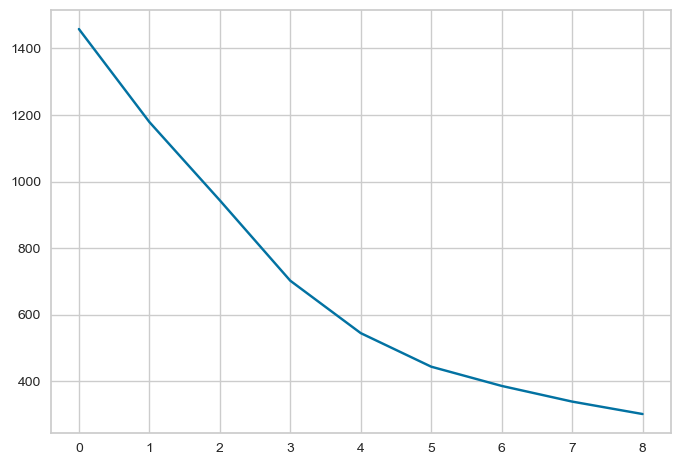

In [1865]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

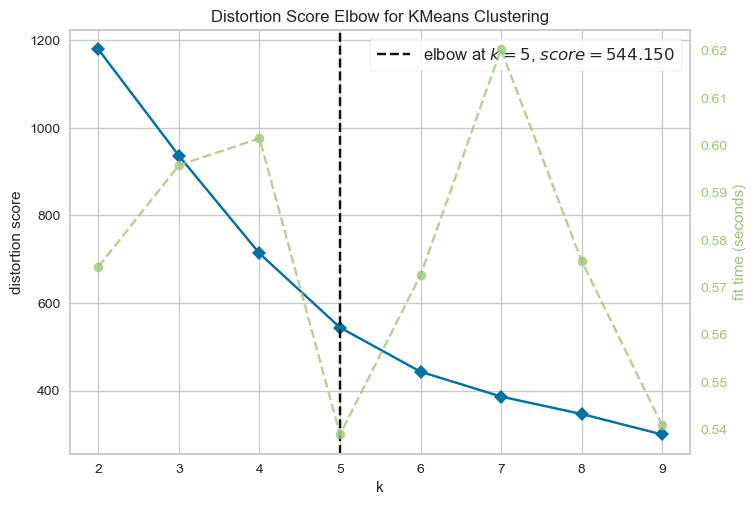

In [1866]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(dat3_1)
visualizer.show()
plt.show()

 ### Silhouette method

Average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990).

The algorithm can be computed as follow:

- Compute clustering algorithm (e.g., k-means clustering) for different values of k.
- For each k, calculate the average silhouette of observations (avg.sil).
- Plot the curve of avg.sil according to the number of clusters k.
- The location of the maximum is considered as the appropriate number of clusters.
- The silhouette score falls within the range [-1, 1].

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

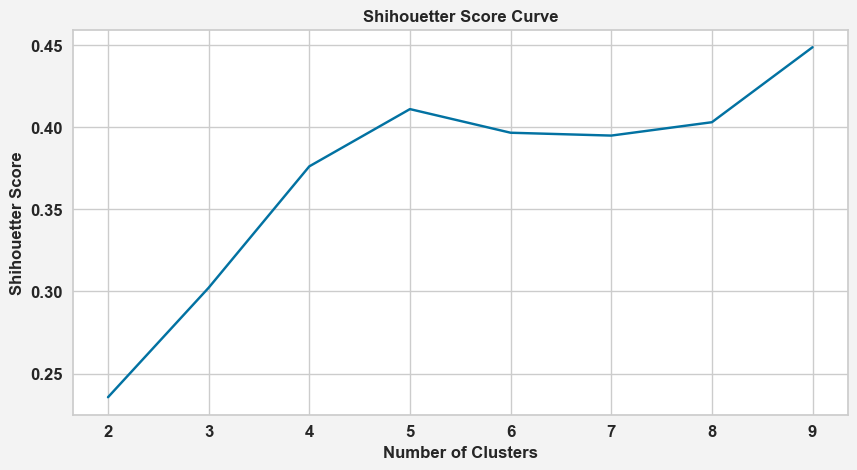

In [1867]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Sihouette score
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse.append([k, silhouette_score(dat3_1, kmeans.labels_)])
    
fig = plt.figure(figsize = (10,5))
fig.set_facecolor("#F3F3F3")
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title('Shihouetter Score Curve', fontsize=12, fontweight='bold')
plt.ylabel('Shihouetter Score', fontsize=12, fontweight='bold');plt.xlabel('Number of Clusters',fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

From the above analysis we find that 6 seems to be a good number of clusters for K means algorithm.

The following steps will apply the number of optimal clusters, visualize clusters distribution plot, and silhouette plots to evaluate their performance.

In [1868]:
# silhouette analysis
range_n_clusters = [3,4,5,6, 7, 8,9,10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=3, the silhouette score is 0.3022656917510675


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=4, the silhouette score is 0.3761313569981206


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=5, the silhouette score is 0.41097878237228286


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=6, the silhouette score is 0.39659641739941726


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=7, the silhouette score is 0.3987497099437727


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=8, the silhouette score is 0.3941310415145305


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=9, the silhouette score is 0.39389222915517325


C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=10, the silhouette score is 0.40694817426479535


Based on these scores, the best cluster number seems to be 5, as it has the highest silhouette score of 0.411, indicating well-defined and dense clusters with good separation between them.

In [1869]:
model_clus2 = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=5, random_state=50)

In [1870]:

inertia = kmeans.inertia_
print("Inertie:", inertia)


silhouette_avg = silhouette_score(dat3_1, kmeans.labels_)
print("Score de silhouette:", silhouette_avg)

Inertie: 261.29982300453594
Score de silhouette: 0.40694817426479535


The inertia value of 261.30 indicates the sum of squared distances of samples to their closest cluster center. A lower inertia value suggests tighter clusters.

The silhouette score of 0.407 suggests that the clustering configuration is reasonable, with clusters being well-separated and members within clusters being relatively close to each other compared to members in other clusters. This score confirms the appropriateness of the clustering solution.

C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aloui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


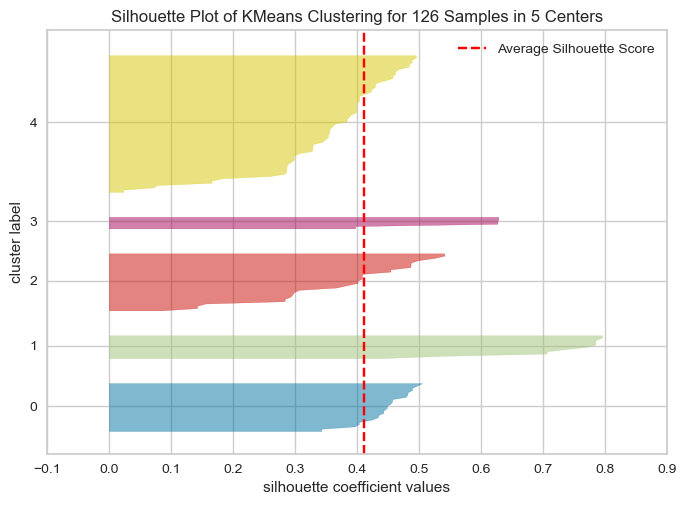

In [1871]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(dat3_1)
visualizer.show()
plt.show()

From the silhouette clusters, the silhouette value of each cluster is above the average, indicating all clusters are optimal. In addition, from the fluctuations of the silhouette plot size, all the clusters have a similar wide of fluctuations. However, from the thickness, clusters 3 and 5 have a less thicker consistency than other clusters.

In [1872]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-4.171000,1.919543,-1.784976,0.215538,0.647525,3
1,-1.847737,-1.407218,-0.116408,0.281253,1.017091,1
2,-0.087863,-1.136124,0.008920,-1.249333,-1.515122,1
3,2.068535,-1.543055,1.645679,1.825488,1.586093,1
4,-0.138099,-1.089086,-0.020925,-1.158410,-1.621148,1
...,...,...,...,...,...,...
121,-0.401123,-0.129207,-0.770116,-0.603127,-0.969997,1
122,4.884327,3.291316,-2.999306,-0.063907,0.686339,4
123,0.952320,0.440232,-0.393139,-0.004109,4.619812,0
124,2.768410,1.589528,-3.544795,1.633017,-2.112801,4


In [1873]:
dat_km['ClusterID'].value_counts()

ClusterID
1    61
0    26
2    22
3    11
4     6
Name: count, dtype: int64

The output shows the count of data points assigned to each cluster in the ClusterID column of the dat_km DataFrame. Each cluster is labeled with a unique identifier (0, 1, 2, 3, 4).

- Cluster 1 has the highest count with 61 data points.
- Cluster 0 follows with 26 data points.
- Cluster 2 contains 22 data points.
- Cluster 3 includes 11 data points.
- Cluster 4 has the smallest count with only 6 data points.

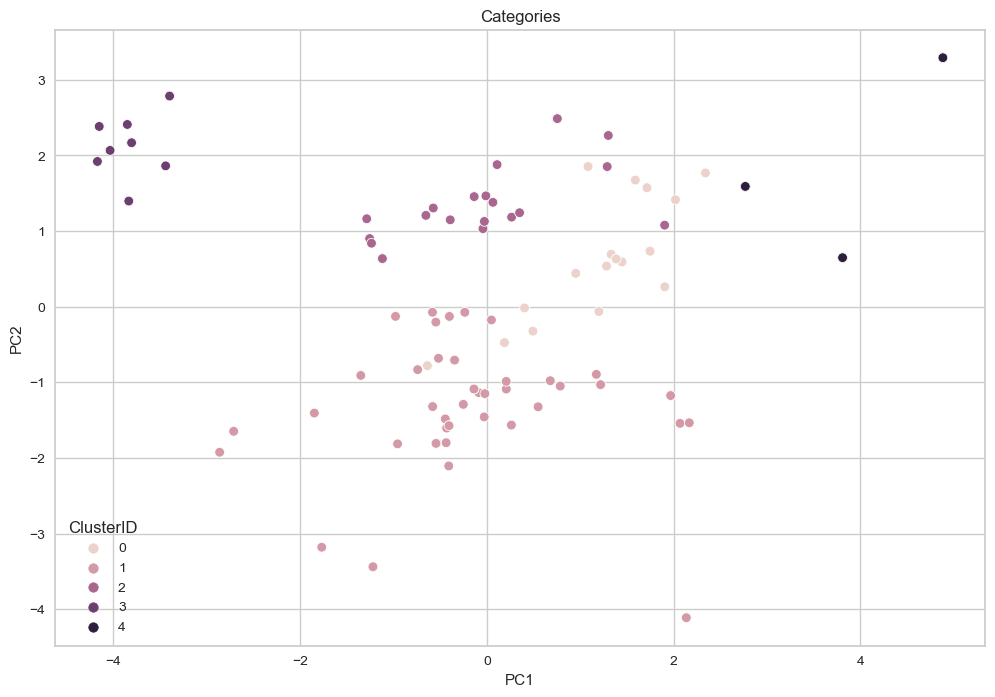

In [1874]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories')
plt.show()

From above plots, we can clearly see the 5 clusters .

Now we are merging clusters with the original dataset.

In [1875]:
dat5=pd.merge(df_selected,dat_km, left_index=True,right_index=True)
dat5.head()

,categorie_socio_professionnel,Tranche_Age,Sexe,Emballage_ecologique,Paiement_Emballage,Gout_Sucre,Gout_Sale,Gout_Amere,Odeur,Texture,...,Product_Categorie_PÂTES ARTISANALES,Product_Categorie_PÂTES AUX OEUFS,Product_Categorie_PÂTES 5 CÉRÉALES,Critere_1_plus_important,PC1,PC2,PC3,PC4,PC5,ClusterID
0,1.0,2.0,0.0,0.0,2.0,3,2,2,2,3,...,1.0,0.0,0.0,1.0,-4.171000,1.919543,-1.784976,0.215538,0.647525,3
1,1.0,1.0,1.0,0.0,0.0,2,4,1,3,4,...,0.0,1.0,0.0,0.0,-1.847737,-1.407218,-0.116408,0.281253,1.017091,1
2,1.0,1.0,0.0,0.0,0.0,1,1,1,3,4,...,0.0,1.0,0.0,3.0,-0.087863,-1.136124,0.008920,-1.249333,-1.515122,1
3,3.0,1.0,0.0,0.0,2.0,2,3,1,4,1,...,0.0,0.0,1.0,1.0,2.068535,-1.543055,1.645679,1.825488,1.586093,1
4,1.0,1.0,0.0,0.0,0.0,1,1,1,3,3,...,1.0,0.0,0.0,3.0,-0.138099,-1.089086,-0.020925,-1.158410,-1.621148,1


In [1876]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,categorie_socio_professionnel,Tranche_Age,Sexe,Emballage_ecologique,Paiement_Emballage,Gout_Sucre,Gout_Sale,Gout_Amere,Odeur,Texture,Couleur,Product_Categorie_PÂTES COURTES,Product_Categorie_PÂTES LONGUES,Product_Categorie_PÂTES SPÉCIALES,Product_Categorie_PÂTES ARTISANALES,Product_Categorie_PÂTES AUX OEUFS,Product_Categorie_PÂTES 5 CÉRÉALES,Critere_1_plus_important,ClusterID
0,1.0,2.0,0.0,0.0,2.0,3,2,2,2,3,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
1,1.0,1.0,1.0,0.0,0.0,2,4,1,3,4,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1.0,1.0,0.0,0.0,0.0,1,1,1,3,4,2,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1
3,3.0,1.0,0.0,0.0,2.0,2,3,1,4,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1,1,1,3,3,3,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1


In [1877]:
dat6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 125
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   categorie_socio_professionnel        123 non-null    float64
 1   Tranche_Age                          123 non-null    float64
 2   Sexe                                 123 non-null    float64
 3   Emballage_ecologique                 123 non-null    float64
 4   Paiement_Emballage                   123 non-null    float64
 5   Gout_Sucre                           123 non-null    int64  
 6   Gout_Sale                            123 non-null    int64  
 7   Gout_Amere                           123 non-null    int64  
 8   Odeur                                123 non-null    int64  
 9   Texture                              123 non-null    int64  
 10  Couleur                              123 non-null    int64  
 11  Product_Categorie_PÂTES COURTES      

Analysis of the clusters

calculating the mean of all the variables of each clusters.

The next step is to evaluate the clustering quality provided by K-Means. Quality evaluation will use the Davies-Bouldin index, silhouette score, and Calinski-Harabasz index.
- Davis-Bouldin Index is a metric for evaluating clustering algorithms. It is defined as a ratio between the cluster scatter and the cluster's separation. Scores range from 0 and up. 0 indicates better clustering.-  Silhouette Coefficient/Score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. The higher the score, the better. 1 means clusters are well apart from each other and clearly distinguished. 0 means clusters are indifferent/the distance between clusters is not significant. -1 means clusters are assigned in the wrong way
- Calinski-Harabasz Index (also known as the Variance Ratio Criterion), is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score, the better the performances.

In [1878]:
# --- Evaluate Clustering Quality Function ---
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
clr = {
    'start': '\033[1m\033[91m',  # bold red
    'end': '\033[0m',  # reset
    'color': '\033[94m',  # blue
}
class Color:
    def __init__(self, start, end, color):
        self.start = start
        self.end = end
        self.color = color

clr = Color('\033[1m\033[91m', '\033[0m', '\033[94m')

def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_index, s_score, ch_index = evaluate_clustering(dat3_1, cluster_labels)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.885
.: Silhouette Score:  0.407
.: Calinski Harabasz Index:  59.056


Davies-Bouldin Index: It measures the average similarity between each cluster and its nearest neighboring cluster. A lower value indicates a better partition.
Silhouette Score: This measure calculates how similar each point is to its own cluster compared to other clusters nearby. A value closer to 1 indicates well-clustered samples, while a value close to 0 indicates overlapping clusters.
Calinski Harabasz Index: It computes the ratio of the intra-cluster dispersion to the inter-cluster dispersion. A higher value suggests a better partition.

For the K-Means clustering performed on dat3_1, the Davies-Bouldin Index is 0.885, the Silhouette Score is 0.407, and the Calinski Harabasz Index is 59.056. These values collectively indicate relatively good clustering cohesion with well-defined and separated clusters

## 4.2 DBSCAN

Before applying the DBSCAN algorithm, we have to define DBSCAN parameters. For MinPoint, since PCA already performed into two dimensions, we will use the default value (4) as MinPoint values. For Epsilon values, using the Nearest Neighbors, we will determine the separation between each data point and its nearest neighbor, and then we sort them before plotting them. After that, we can determine the greatest value at the curve of the graph from the plot.

In [1786]:
from sklearn.cluster import DBSCAN

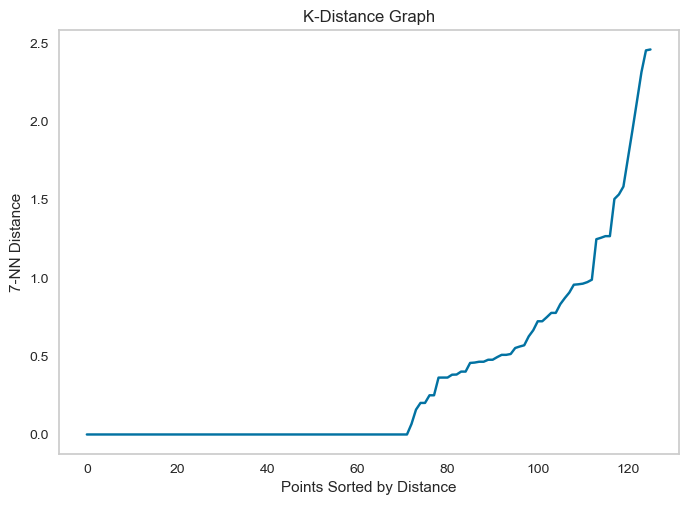

In [1787]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(dat3_1)
distances, indices = knn.kneighbors(dat3_1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

This code calculates the distances to the 7th nearest neighbor for each data point and sorts them. Then, it plots these distances to visualize the relationship between the points and their 7th nearest neighbor.

To determine the appropriate epsilon value for DBSCAN, you can look for the "knee" or "elbow" point on the plotted curve. This knee point represents a significant change in the distance between points and their nearest neighbors, which can be considered as a threshold for defining the epsilon value.

Once you identify the knee point, you can choose the corresponding distance as the epsilon value for DBSCAN. This epsilon value determines the maximum distance between two points for them to be considered as part of the same neighborhood.

In [1802]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=1.5, min_samples=4)
dbscan.fit(dat3_1)


cluster_labels = dbscan.labels_


In [1804]:

n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print('Nombre de clusters:', n_clusters_)
print('Nombre de points d\'anomalie:', n_noise_)



Nombre de clusters: 6
Nombre de points d'anomalie: 33


DBSCAN clustered the data into 6 clusters, with 33 points classified as anomalies (outliers). This indicates that DBSCAN identified distinct groupings in the data, represented by the clusters, while also recognizing some data points as anomalies that do not belong to any specific cluster. 

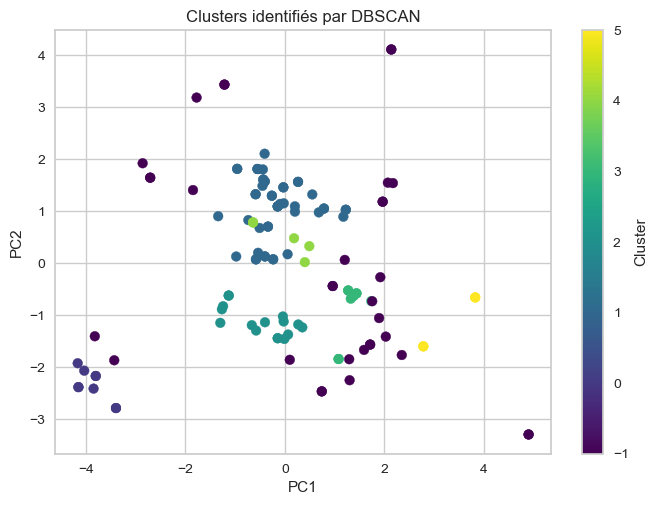

In [1805]:

from sklearn.decomposition import PCA


pca = PCA(n_components=2)
dat3_1_pca = pca.fit_transform(dat3_1)


plt.scatter(dat3_1_pca[:,0], dat3_1_pca[:,1], c=cluster_labels, cmap='viridis')
plt.title('Clusters identifiés par DBSCAN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


Now we are merging clusters with the original dataset.

In [1806]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_k = pd.concat([dat4, pd.Series(cluster_labels)], axis=1)
dat_k.columns = ['PC1', 'PC2','PC3','PC4','PC5','Cluster']
dat_k

,PC1,PC2,PC3,PC4,PC5,Cluster
0,-4.171000,1.919543,-1.784976,0.215538,0.647525,0
1,-1.847737,-1.407218,-0.116408,0.281253,1.017091,-1
2,-0.087863,-1.136124,0.008920,-1.249333,-1.515122,1
3,2.068535,-1.543055,1.645679,1.825488,1.586093,-1
4,-0.138099,-1.089086,-0.020925,-1.158410,-1.621148,1
...,...,...,...,...,...,...
121,-0.401123,-0.129207,-0.770116,-0.603127,-0.969997,1
122,4.884327,3.291316,-2.999306,-0.063907,0.686339,-1
123,0.952320,0.440232,-0.393139,-0.004109,4.619812,-1
124,2.768410,1.589528,-3.544795,1.633017,-2.112801,5


In [1807]:
dat_k['Cluster'].value_counts()

Cluster
 1    48
-1    33
 2    16
 3    11
 0     9
 4     5
 5     4
Name: count, dtype: int64

The table dat_k provides the cluster labels assigned by DBSCAN to each data point along with their principal component scores. The value_counts() method shows the distribution of data points across different clusters.

In this case:

- Cluster 1 contains the highest number of points, indicating a dominant cluster in the data.
- Cluster -1 represents the outliers or anomalies detected by DBSCAN.
- Clusters 2, 3, 0, 4, and 5 contain

In [1808]:
dat5=pd.merge(df_selected,dat_k, left_index=True,right_index=True)
dat5.head()

,categorie_socio_professionnel,Tranche_Age,Sexe,Emballage_ecologique,Paiement_Emballage,Gout_Sucre,Gout_Sale,Gout_Amere,Odeur,Texture,...,Product_Categorie_PÂTES ARTISANALES,Product_Categorie_PÂTES AUX OEUFS,Product_Categorie_PÂTES 5 CÉRÉALES,Critere_1_plus_important,PC1,PC2,PC3,PC4,PC5,Cluster
0,1.0,2.0,0.0,0.0,2.0,3,2,2,2,3,...,1.0,0.0,0.0,1.0,-4.171000,1.919543,-1.784976,0.215538,0.647525,0
1,1.0,1.0,1.0,0.0,0.0,2,4,1,3,4,...,0.0,1.0,0.0,0.0,-1.847737,-1.407218,-0.116408,0.281253,1.017091,-1
2,1.0,1.0,0.0,0.0,0.0,1,1,1,3,4,...,0.0,1.0,0.0,3.0,-0.087863,-1.136124,0.008920,-1.249333,-1.515122,1
3,3.0,1.0,0.0,0.0,2.0,2,3,1,4,1,...,0.0,0.0,1.0,1.0,2.068535,-1.543055,1.645679,1.825488,1.586093,-1
4,1.0,1.0,0.0,0.0,0.0,1,1,1,3,3,...,1.0,0.0,0.0,3.0,-0.138099,-1.089086,-0.020925,-1.158410,-1.621148,1


In [1810]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,categorie_socio_professionnel,Tranche_Age,Sexe,Emballage_ecologique,Paiement_Emballage,Gout_Sucre,Gout_Sale,Gout_Amere,Odeur,Texture,Couleur,Product_Categorie_PÂTES COURTES,Product_Categorie_PÂTES LONGUES,Product_Categorie_PÂTES SPÉCIALES,Product_Categorie_PÂTES ARTISANALES,Product_Categorie_PÂTES AUX OEUFS,Product_Categorie_PÂTES 5 CÉRÉALES,Critere_1_plus_important,Cluster
0,1.0,2.0,0.0,0.0,2.0,3,2,2,2,3,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,1.0,1.0,1.0,0.0,0.0,2,4,1,3,4,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
2,1.0,1.0,0.0,0.0,0.0,1,1,1,3,4,2,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1
3,3.0,1.0,0.0,0.0,2.0,2,3,1,4,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1
4,1.0,1.0,0.0,0.0,0.0,1,1,1,3,3,3,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1


The following step is to assess the clustering quality that DBSCAN provides.

In [1811]:
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(dat3_1, cluster_labels)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  1.475
.: Silhouette Score:  0.275
.: Calinski Harabasz Index:  20.942


- Davies-Bouldin Index (DBI): The value of 1.475 suggests moderate separation between clusters, indicating that the clusters are somewhat distinct but with some overlap or ambiguity.
- Silhouette Score: With a score of 0.275, it indicates that the clustering is reasonable, with data points being relatively close to their own cluster's centroid and reasonably separated from other clusters.
- Calinski-Harabasz Index (CHI): The index value of 20.942 is relatively low, suggesting that the clusters may not be well-separated and distinct. It indicates that there could be room for improvement in cluster separability.

## Hierarchical Clustering

As a first step, we have to make a dendrogram first and then draw a horizontal line between both points. After that, we will evaluate the created dendrogram and compare it results with Calinski-Harabasz Score

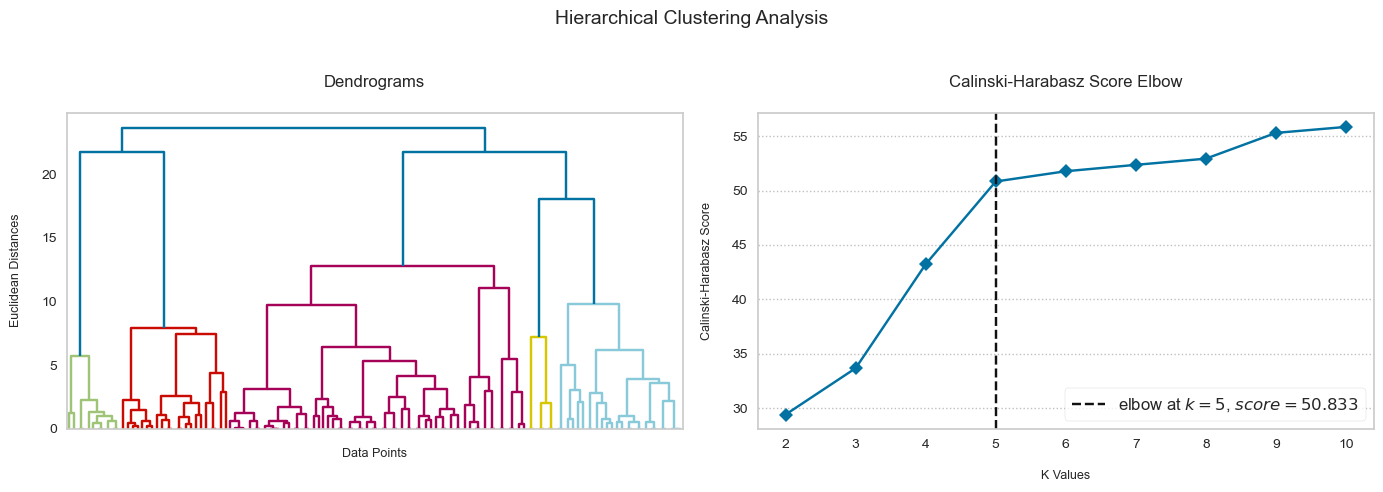

In [1886]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

def agg_dendrogram(X):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Dendrogram
    dend = shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'), ax=ax1)
    ax1.axhline(y=115, color='grey', linestyle='--')
    ax1.set_xlabel('\nData Points', fontsize=9)
    ax1.set_ylabel('Euclidean Distances\n', fontsize=9)
    ax1.tick_params(labelbottom=False)
    ax1.grid(axis='both', alpha=0)
    ax1.set_title('Dendrograms\n', fontsize=12)

    # Plot Calinski-Harabasz Score Elbow
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', fontsize=12)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='grey', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    
    plt.suptitle('Hierarchical Clustering Analysis\n', fontsize=14)
    plt.tight_layout()
    plt.show()

# Example usage:
agg_dendrogram(dat3_1)


The dendrogram visually represents the hierarchical clustering process, showing how data points are grouped together based on their distances. The height of each vertical line indicates the distance at which clusters are merged. In this case, the tallest vertical line corresponds to the first branch on the left, suggesting that the optimal number of clusters could be five, as it cuts the dendrogram into four distinct parts.

Additionally, the Calinski-Harabasz score, displayed on the elbow plot, helps determine the optimal number of clusters. The point where the score starts to plateau or the curve begins to show diminishing returns suggests the appropriate number of clusters. In this instance, the elbow point corresponds to a cluster number of five, indicating that it provides the most significant improvement in cluster cohesion and separation.

Therefore, both the dendrogram and the Calinski-Harabasz score support the choice of five clusters as the optimal solution for the hierarchical clustering analysis.

Next, we will implement this number in the agglomerative clustering algorithm and visualize and evaluate the clusters created.

In [1901]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


agg_cluster = AgglomerativeClustering(n_clusters=4)
y_agg_cluster = agg_cluster.fit_predict(dat3_1)




In [1903]:
db_agg, ss_agg, ch_agg = evaluate_clustering(dat3_1, y_agg_cluster)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  1.013
.: Silhouette Score:  0.413
.: Calinski Harabasz Index:  51.32


- Davies-Bouldin Index (DB Index):
The DB index measures the average similarity between each cluster and its nearest neighboring cluster, where a lower value indicates better separation and distinctiveness of clusters.
In this case, the DB index of 1.013 suggests that the clusters are reasonably well-separated, with minimal overlap or confusion between them.
- Silhouette Score:
The silhouette score evaluates the compactness and separation of clusters. It measures how similar each data point is to its own cluster compared to other clusters, ranging from -1 to 1.
A higher silhouette score indicates better-defined clusters, with values closer to 1 signifying dense and well-separated clusters.
With a silhouette score of 0.413, the clustering appears to have good cohesion and separation, indicating distinct clusters.
- Calinski Harabasz Index:
The Calinski Harabasz index quantifies the ratio of between-cluster dispersion to within-cluster dispersion, where a higher value indicates better clustering.
A higher Calinski Harabasz index suggests that the clusters are well-separated and distinct.
The index of 51.32 indicates relatively good clustering performance, with well-defined clusters.

Overall, these results suggest that the clustering has been relatively successful in forming distinct and cohesive clusters. 

## Models Evaluation

In this section, an evaluation of the quality of the clustering results from the algorithm that has been made will be carried out. This section will compare each clustering algorithm's clustering results (Davies-Bouldin index and silhouette score) in table format.

In [1907]:
# --- Comparison Table ---
compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN','Hierarchical'], 
                        'Davies-Bouldin Index': [db_index, db_dbscan,db_agg ],
                        'Silhouette Score': [s_score, ss_dbscan,ss_dbscan],
                        'Calinski-Harabasz Index': [ch_index, ch_dbscan,ch_dbscan]})

# --- Print the Comparison Table ---
print("Model                  Davies-Bouldin Index     Silhouette Score      Calinski-Harabasz Index")
print("---------------------------------------------------------------------------------------------")
for index, row in compare.iterrows():
    print(f"{row['Model']:24}   {row['Davies-Bouldin Index']:24}   {row['Silhouette Score']:24}   {row['Calinski-Harabasz Index']:24}")


Model                  Davies-Bouldin Index     Silhouette Score      Calinski-Harabasz Index
---------------------------------------------------------------------------------------------
K-Means                                       0.885                      0.407                     59.056
DBSCAN                                        1.475                      0.275                     20.942
Hierarchical                                  1.013                      0.275                     20.942


K-Means has the lowest Davies-Bouldin Index, indicating better separation between clusters.
it also has the highest Silhouette Score, suggesting that the clusters are well-defined and objects are assigned correctly.
K-Means has the highest Calinski-Harabasz Index, indicating that it forms more cohesive clusters.
Based on these metrics, K-Means seems to be the best choice among the three models for this dataset. It shows better performance in terms of cluster separation, compactness, and silhouette score.

## Cluster Profiling 

As mentioned in the previous section, this section will perform cluster profiling to identify the characteristics of the clusters that have been created by K-Means.

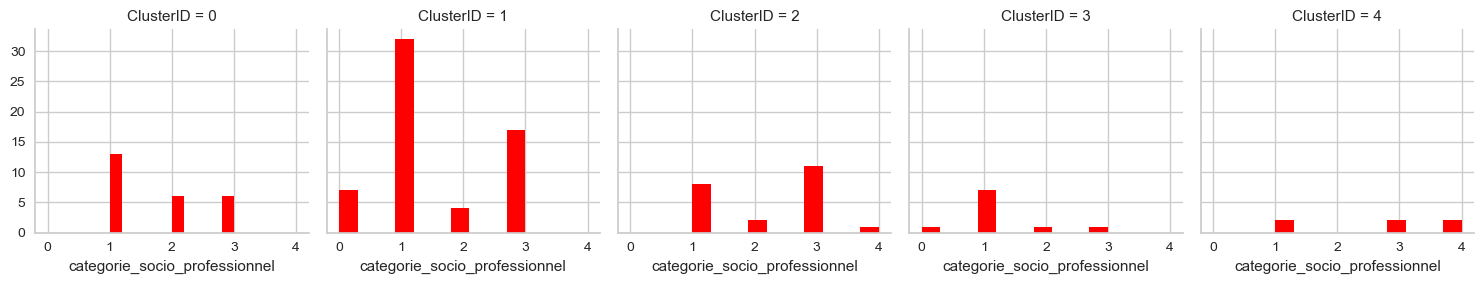

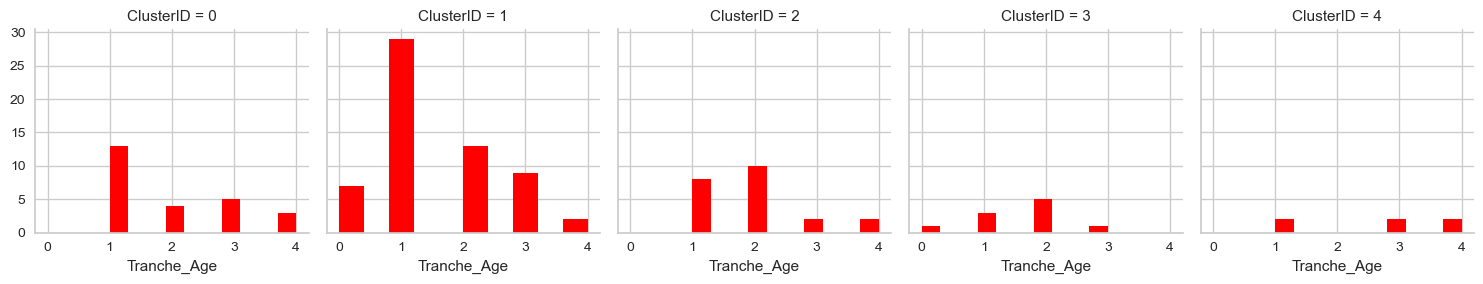

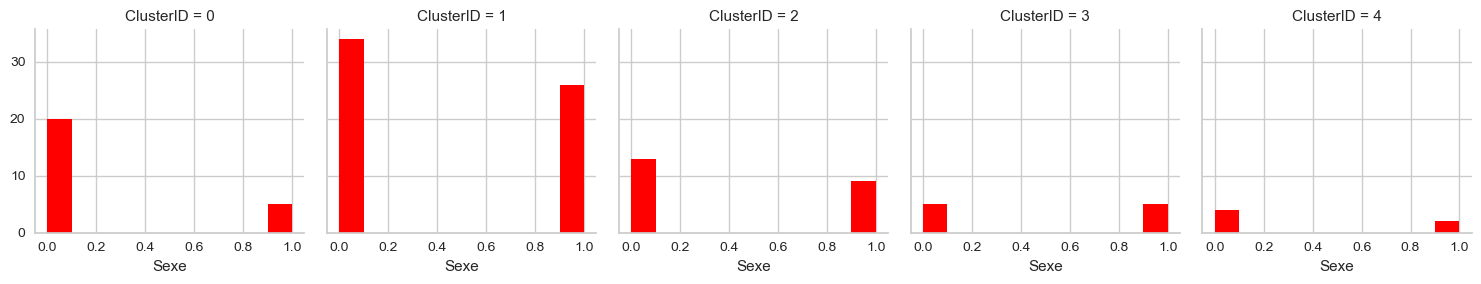

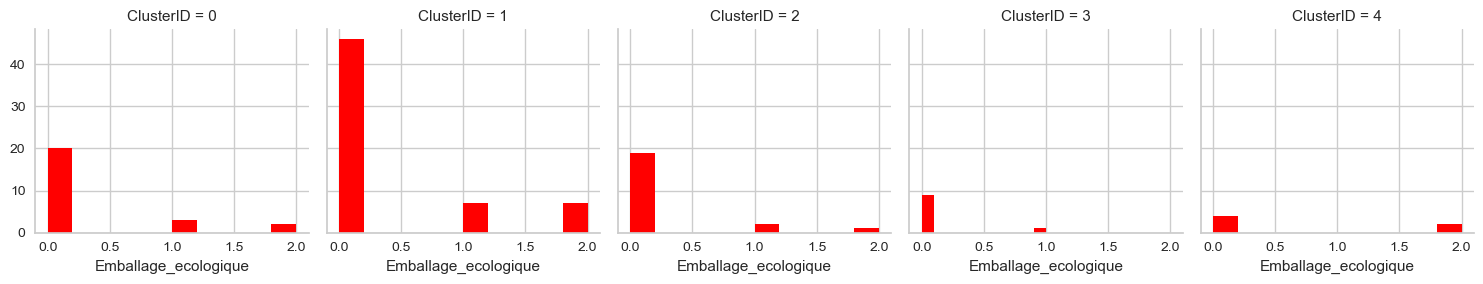

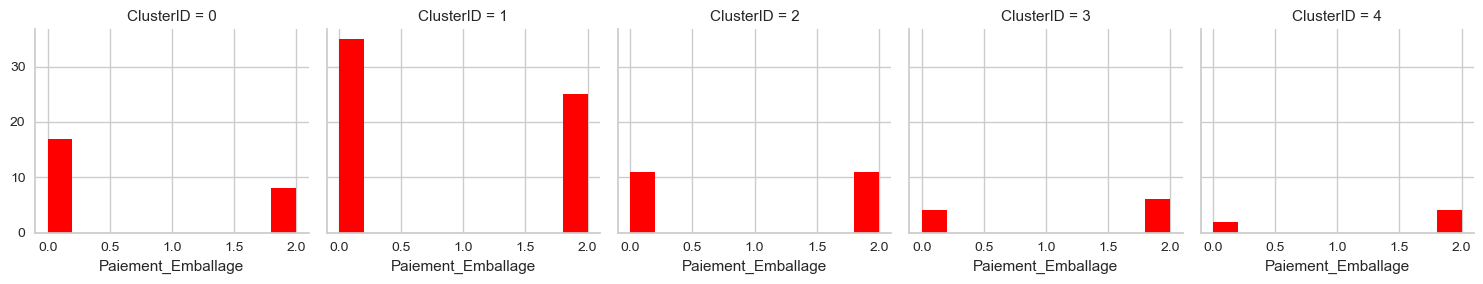

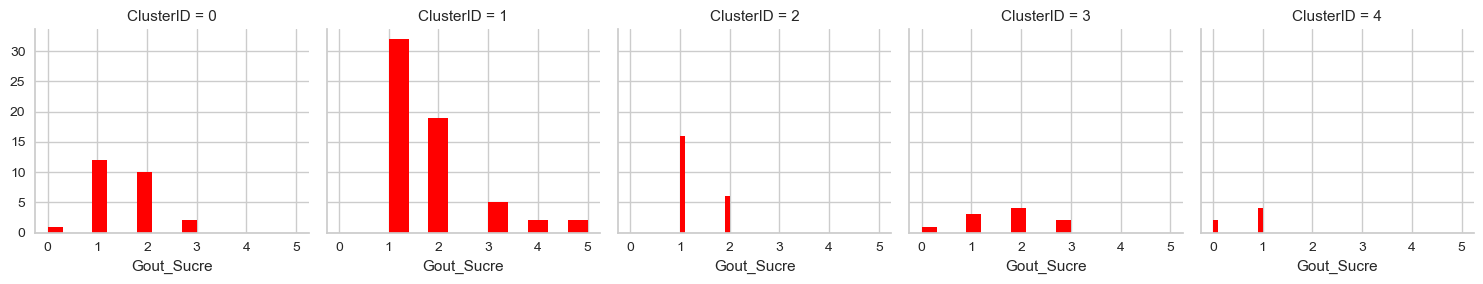

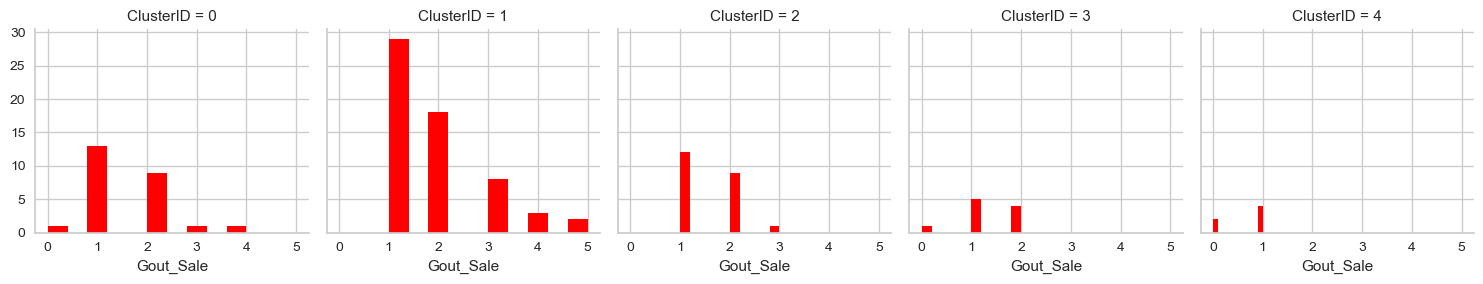

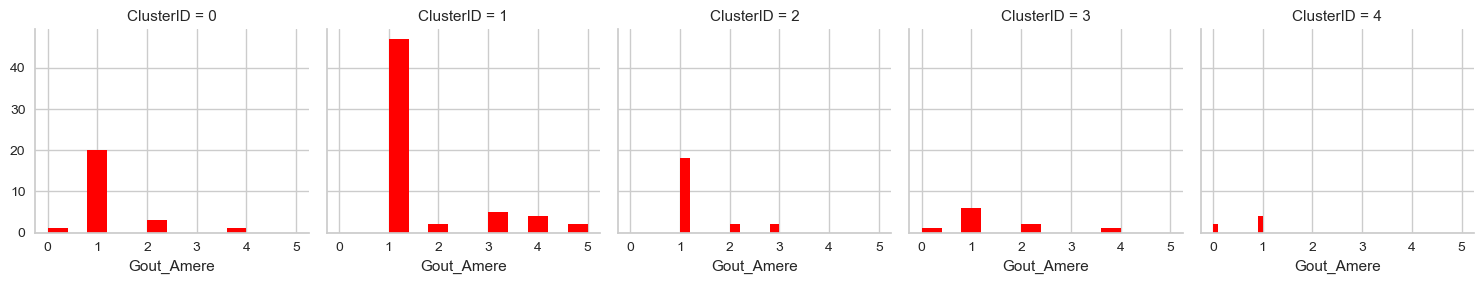

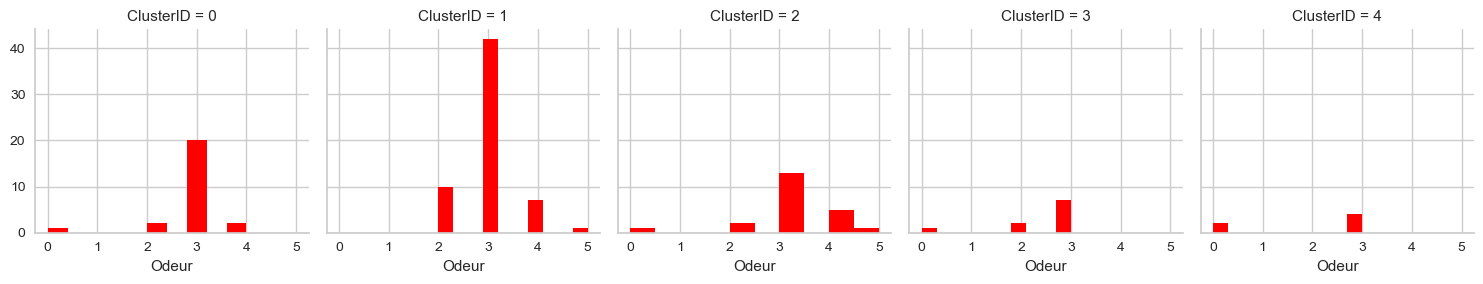

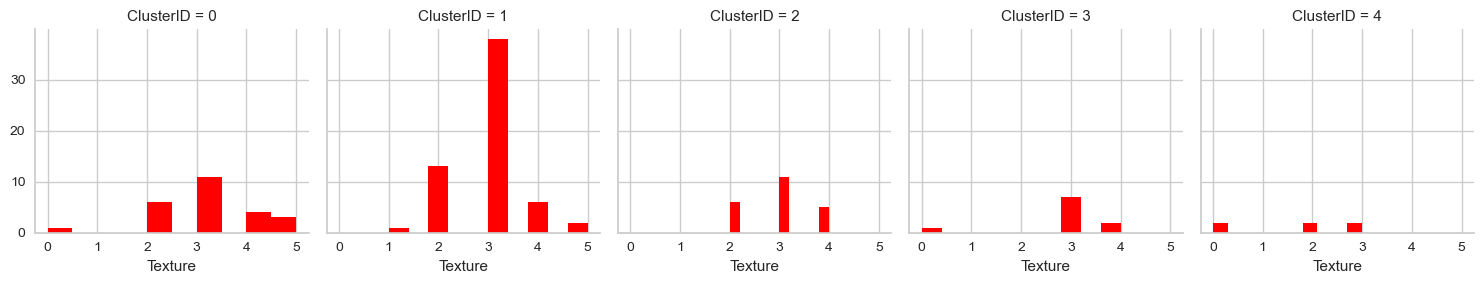

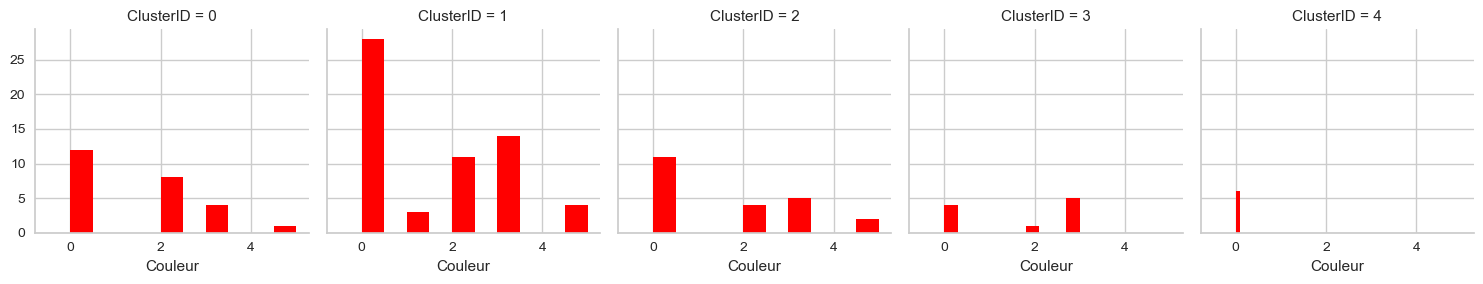

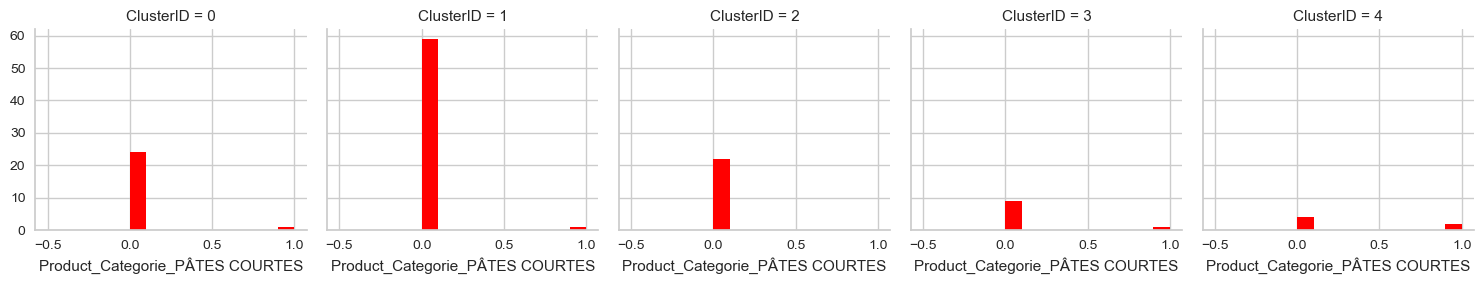

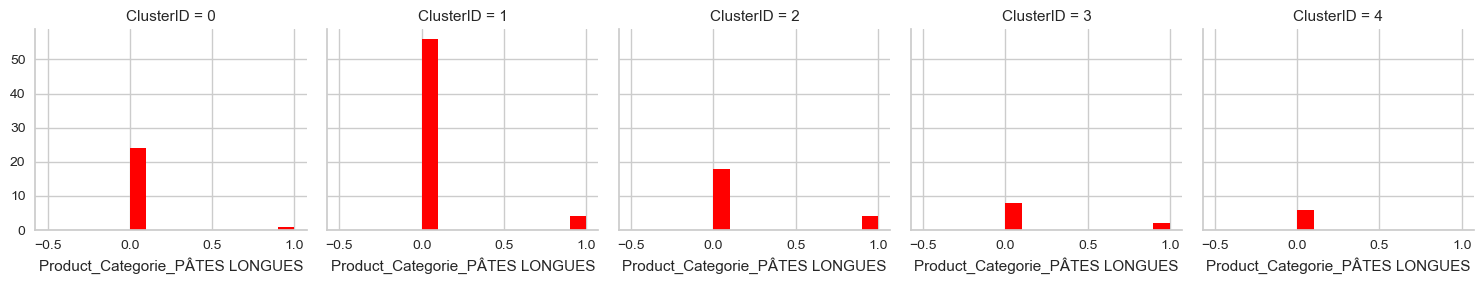

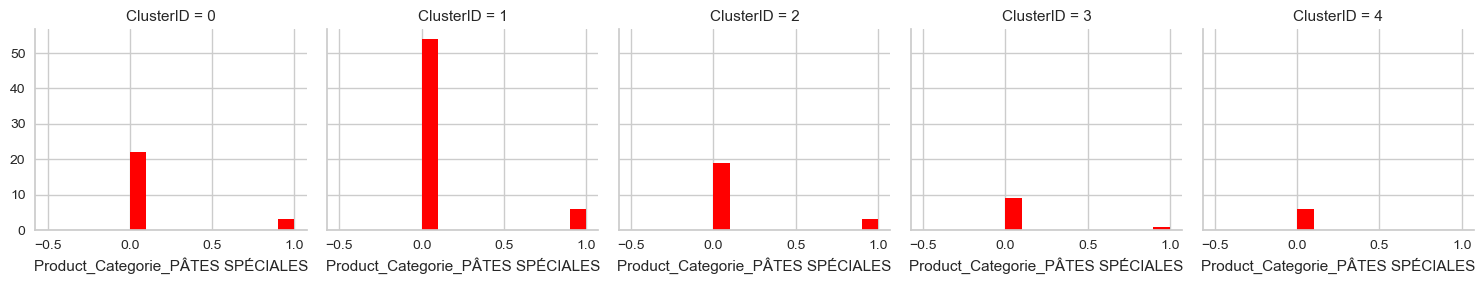

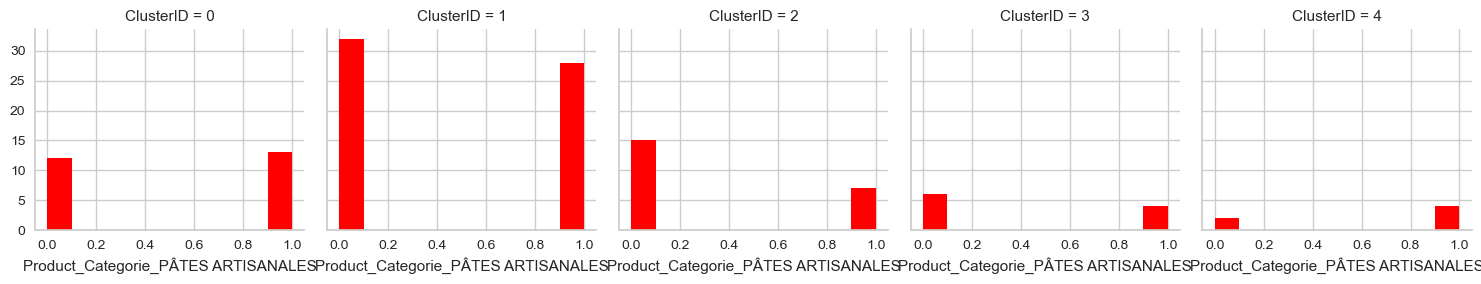

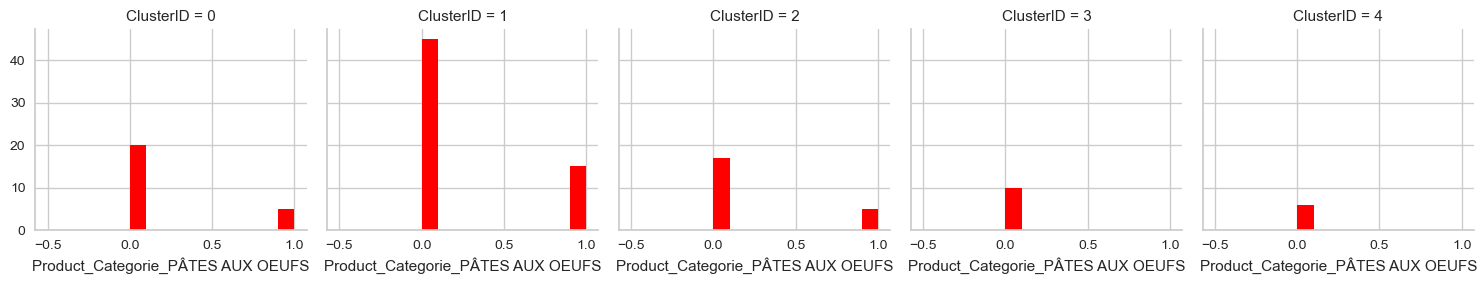

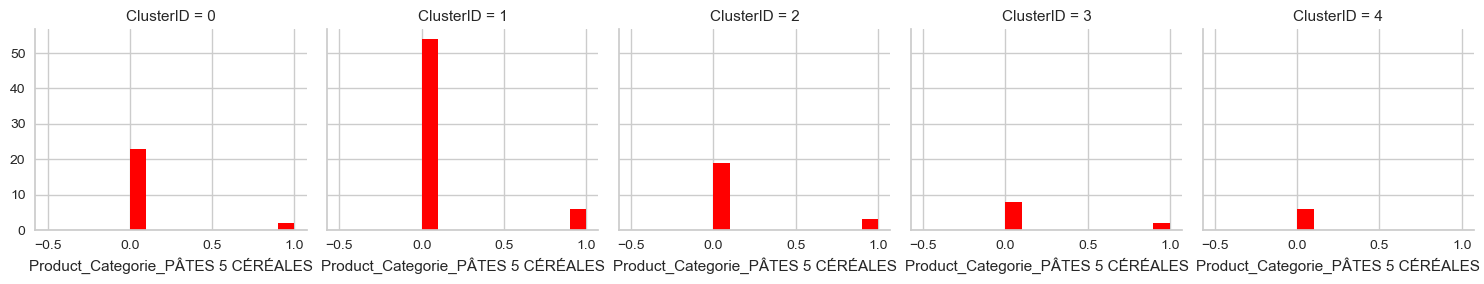

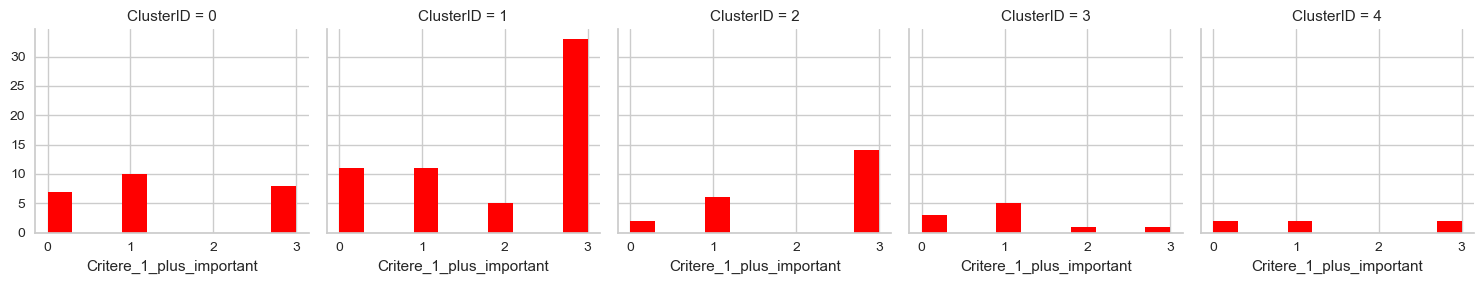

In [1879]:

aux=dat6.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(dat6, col='ClusterID')
    grid.map(plt.hist, cluster,color='red')

The code iterates over each feature in the dataset dat6, excluding the last column which contains the cluster IDs.
For each feature, it creates a separate histogram for each cluster using sns.FacetGrid.
The histograms are plotted side by side, with each subplot representing a different cluster.
The histograms provide insights into how each feature is distributed within each cluster, allowing for the identification of patterns and differences between clusters.

Cluster 0:

Demographics: Mostly females (20 out of 25), with a majority in the 18-25 age range (13 out of 25).
Socio-professional category: Students and employees are well-represented.
Preferences: They prioritize texture (11 out of 25) and value nutritional value (8 out of 25) when choosing pasta. They are also concerned about the environmental impact of packaging (20 out of 25).
Product preferences: They tend to prefer short pasta (24 out of 25) and are interested in artisanal pasta (13 out of 25).
Cluster 1:

Demographics: A balanced mix of males and females, with a majority in the 18-35 age range (42 out of 60).
Socio-professional category: Students, employees, and retirees are well-represented.
Preferences: They prioritize taste (32 out of 60) and value nutritional value (29 out of 60) when choosing pasta. They are also concerned about the environmental impact of packaging (46 out of 60).
Product preferences: They tend to prefer short pasta (59 out of 60) and are interested in artisanal pasta (28 out of 60).
Cluster 2:

Demographics: Mostly females (13 out of 22), with a majority in the 25-50 age range (10 out of 22).
Socio-professional category: Employees and retirees are well-represented.
Preferences: They prioritize taste (16 out of 22) and value nutritional value (12 out of 22) when choosing pasta. They are less concerned about the environmental impact of packaging (19 out of 22).
Product preferences: They tend to prefer short pasta (22 out of 22) and are interested in artisanal pasta (15 out of 22).
Cluster 3:

Demographics: A balanced mix of males and females, with a majority in the 25-50 age range (5 out of 10).
Socio-professional category: Employees and retirees are well-represented.
Preferences: They prioritize taste (5 out of 10) and value nutritional value (4 out of 10) when choosing pasta. They are less concerned about the environmental impact of packaging (9 out of 10).
Product preferences: They tend to prefer short pasta (9 out of 10) and are interested in artisanal pasta (6 out of 10).
Cluster 4:

Demographics: A small cluster with a balanced mix of males and females, with a majority in the 50+ age range (4 out of 6).
Socio-professional category: Retirees are well-represented.
Preferences: They prioritize taste (4 out of 6) and value nutritional value (4 out of 6) when choosing pasta. They are less concerned about the environmental impact of packaging (4 out of 6).
Product preferences: They tend to prefer short pasta (6 out of 6) and are interested in artisanal pasta (4 out of 6).

Cluster 0: "Eco-conscious Young Adults"
Cluster 1: "Balanced Taste Seekers"
Cluster 2: "Mature Taste and Nutrition Focused"
Cluster 3: "Moderate Taste and Nutrition Seekers"
Cluster 4: "Senior Taste and Nutrition Lovers"

### Cluster 0:

Demographics: Mostly females (20/25), primarily aged 18-25 (13/25).
Socio-professional category: Students and employees are prominent.
Preferences: Texture (11/25) and nutritional value (8/25) are prioritized. Concerned about environmental impact of packaging (20/25).
Product preferences: Prefer short pasta (24/25) and interested in artisanal pasta (13/25).

### Cluster 1:

Demographics: Balanced gender mix, majority aged 18-35 (42/60).
Socio-professional category: Students, employees, and retirees are represented.
Preferences: Taste (32/60) and nutritional value (29/60) prioritized. Concerned about environmental impact of packaging (46/60).
Product preferences: Prefer short pasta (59/60) and interested in artisanal pasta (28/60).

### Cluster 2:

Demographics: Mostly females (13/22), primarily aged 25-50 (10/22).
Socio-professional category: Employees and retirees prominent.
Preferences: Taste (16/22) and nutritional value (12/22) prioritized. Less concern about packaging (19/22).
Product preferences: Prefer short pasta (22/22) and interested in artisanal pasta (15/22).

### Cluster 3:

Demographics: Balanced gender mix, majority aged 25-50 (5/10).
Socio-professional category: Employees and retirees represented.
Preferences: Taste (5/10) and nutritional value (4/10) prioritized. Less concern about packaging (9/10).
Product preferences: Prefer short pasta (9/10) and interested in artisanal pasta (6/10).

### Cluster 4:

Demographics: Balanced gender mix, majority aged 50+ (4/6).
Socio-professional category: Retirees prominent.
Preferences: Taste (4/6) and nutritional value (4/6) prioritized. Less concern about packaging (4/6).
Product preferences: Prefer short pasta (6/6) and interested in artisanal pasta (4/6).

##### Overall, Cluster 1 appears to represent a diverse group with significant concern for taste, nutritional value, and environmental impact, making it a potentially lucrative target market.